# Project 2: Data Preparation & Feature Engineering

#### Author: Ruixin Chen, Hang Yu

## Data Loading

##### Loaded the data from github by function read_csv  in pandas library, and then renamed the columns, the result is as followed:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
url = "https://raw.githubusercontent.com/MarcyChen-ruixin/AIM-5001/main/M10_Data.csv"
df = pd.read_csv(url)
print(df.head())
df.columns=['symboling','normalized_losses','make','fueltype','aspiration','doors_num','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','cylinders_num','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
print(df)            

   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.6  ...   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front  94.5  ...   
2  2  164         audi  gas  std  four        sedan  fwd  front  99.8  ...   
3  2  164         audi  gas  std  four        sedan  4wd  front  99.4  ...   
4  2    ?         audi  gas  std   two        sedan  fwd  front  99.8  ...   

   130  mpfi  3.47  2.68     9  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19   3.4  10.0  102  5500  24  30  13950  
3  136  mpfi  3.19   3.4   8.0  115  5500  18  22  17450  
4  136  mpfi  3.19   3.4   8.5  110  5500  19  25  15250  

[5 rows x 26 columns]
     symboling normalized_losses         make fueltype aspiration doors_num  \
0            3                 ?  alfa-romero      gas        std       two

## Exploratory Data Analysis

##### Firstly, I changed the "?" in dataframe to NAN value
##### Secondly, I changed the content of the column cylinders_num and column  doors_num, make those string become numberic.

In [2]:
df.replace('?', np.nan, inplace = True)
def split_word(word):
    digit=0
    if word=='eight':
        digit=8
    if word=='five':
        digit=5
    if word=='four':
        digit=4
    if word=='six':
        digit=6
    if word=='three':
        digit=3
    if word=='twelve':
        digit=12
    if word=='two':
        digit=2
    return digit
for i in range(len(df['cylinders_num'])):
    df['cylinders_num'][i]=split_word(df['cylinders_num'][i])
    df['doors_num'][i]=split_word(df['doors_num'][i])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15916\200427787.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylinders_num'][i]=split_word(df['cylinders_num'][i])
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15916\200427787.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['doors_num'][i]=split_word(df['doors_num'][i])


##### Now start to analyze the numeric from the data
Since make, fueltype, aspiration, body_style, drive_wheels,engine_location,engine_type,fuel_system are categorical variable, the most appropriate chart to make is the bar chart. For the rest of our attributes, since they are numerical and continuous (normalized_losses, wheel_base, length, width, height, curb_weight, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg, price) and integer (symboling, cylinders_num, doors_num), the most appropriate chart is a box plot and/or a histogram. 

##### Numerical  Attributes
* using describe function to get a data summary
* using boxplot function in matplotlib.pyplot library and seaborn library to draw the bar chart
* using hist function in matplotlib.pyplot library and seaborn library to draw the histogram
* getting discussion of result

##### Price

count       200
unique      185
top       16500
freq          2
Name: price, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


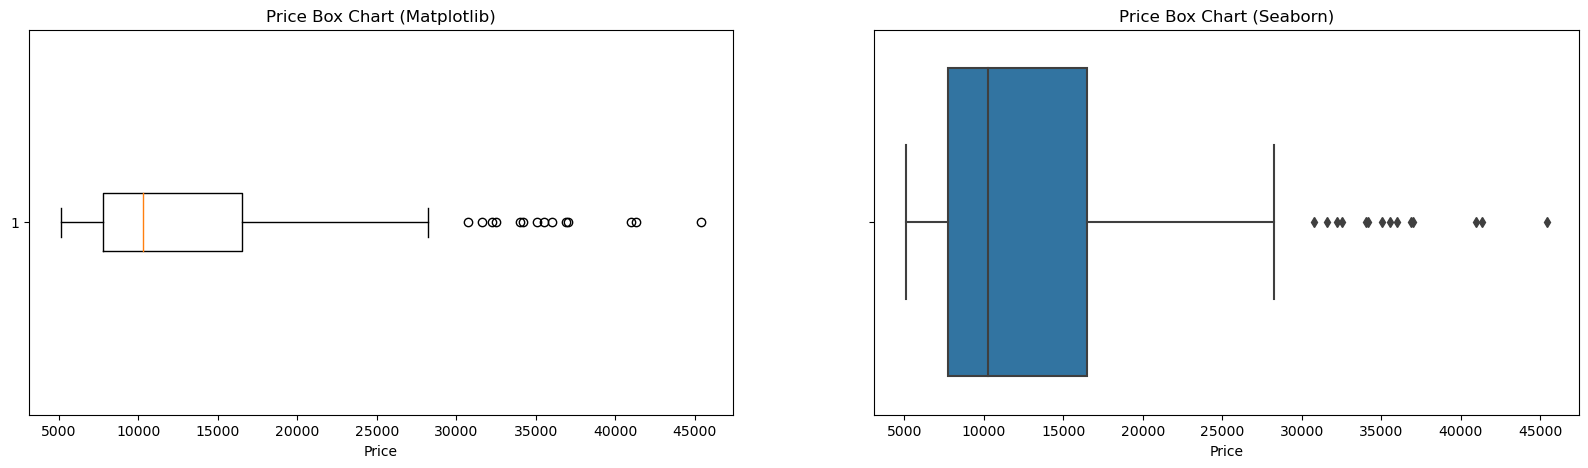

In [3]:
print(df['price'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df_original = df.copy()
df.dropna(subset=['price'], inplace=True)
df['price'] = df['price'].astype('float')
plt.boxplot(df['price'], vert=False)
plt.title('Price Box Chart (Matplotlib)')
plt.xlabel('Price')
plt.subplot(122)
df['price'] = df['price'].astype('float')
df_price=df["price"]
sns.boxplot(df_price,orient='v')
plt.title('Price Box Chart (Seaborn)')
plt.xlabel('Price')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


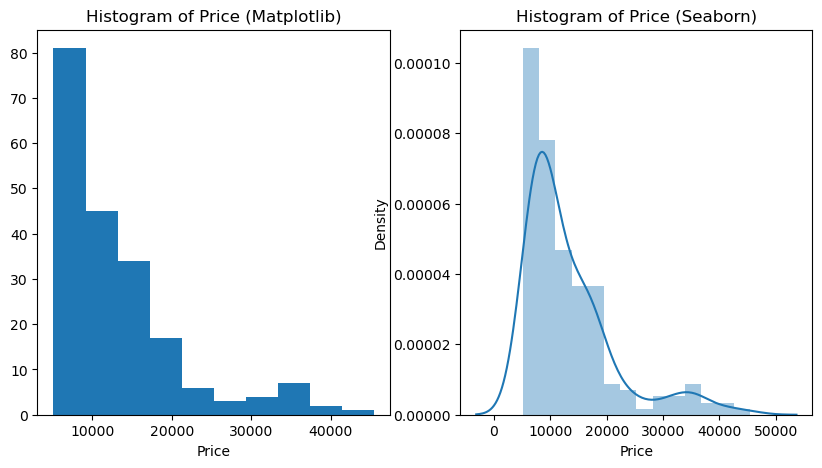

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(tuple(df['price']))
plt.xlabel('Price')
plt.title('Histogram of Price (Matplotlib)')
plt.subplot(122)
sns.distplot(df_price)
plt.xlabel('Price')
plt.title('Histogram of Price (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for price is approximately 10000. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the price attribute. Based on the histogram, the shape of the observations for the price attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### df_symboling

* using value_counts function to get the nember of each symboling

count    200.000000
mean       0.830000
std        1.248557
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64
 0    65
 1    52
 2    32
 3    26
-1    22
-2     3
Name: symboling, dtype: int64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


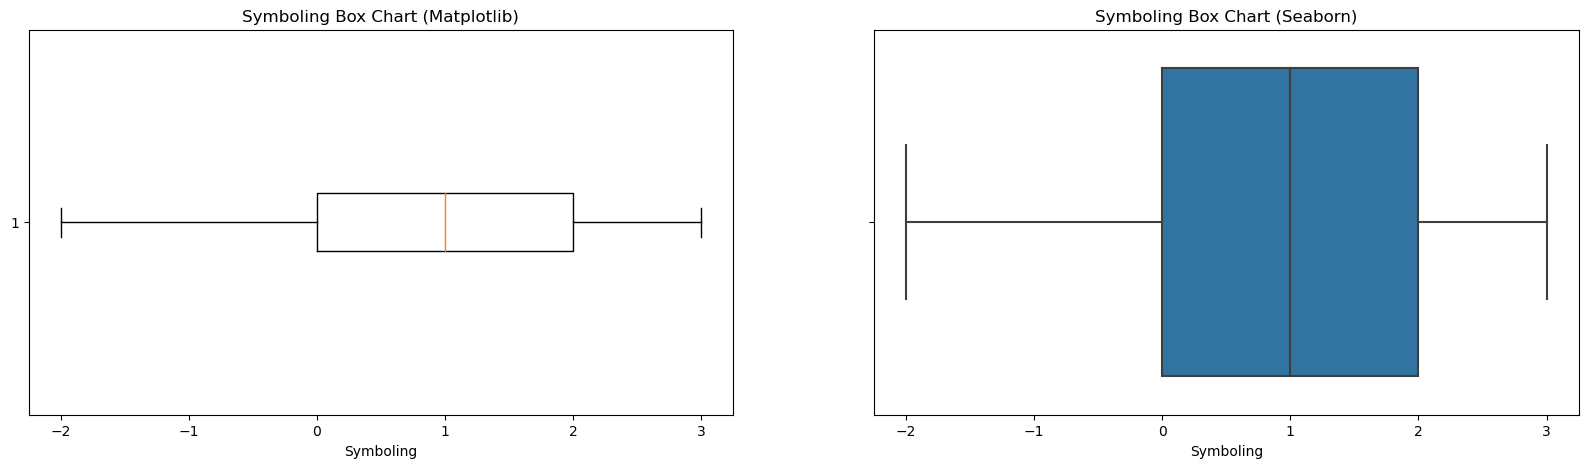

In [5]:
print(df['symboling'].describe())
print(df['symboling'].value_counts())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.boxplot(df['symboling'], vert=False)
plt.xlabel('Symboling')
plt.title('Symboling Box Chart (Matplotlib)')
plt.subplot(122)
df['symboling'] = df['symboling'].astype('float')
df_symboling=df["symboling"]
sns.boxplot(df_symboling,orient='v')
plt.xlabel('Symboling')
plt.title('Symboling Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


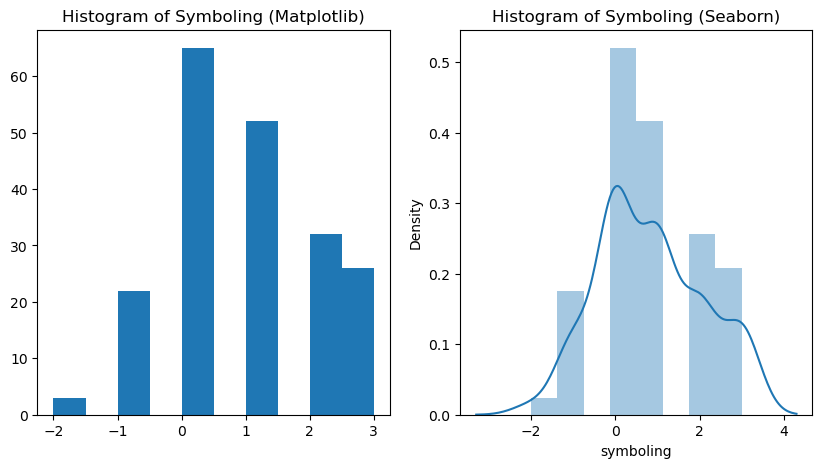

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['symboling'], inplace=True)
df['symboling'] = df['symboling'].astype('float')
plt.hist(tuple(df['symboling']))
plt.title('Histogram of Symboling (Matplotlib)')
plt.subplot(122)
sns.distplot(df['symboling'])
plt.title('Histogram of Symboling (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for symboling is approximately 1.
- Histogram: The histogram proves the result of the descriptive statistics for the symboling attribute. Based on the histogram, it confirms that the biggest distribuion of symboling, for this dataset is 0, the second biggest distribuion of symboling is 1.

##### normalized_losses

count     164
unique     51
top       161
freq       11
Name: normalized_losses, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


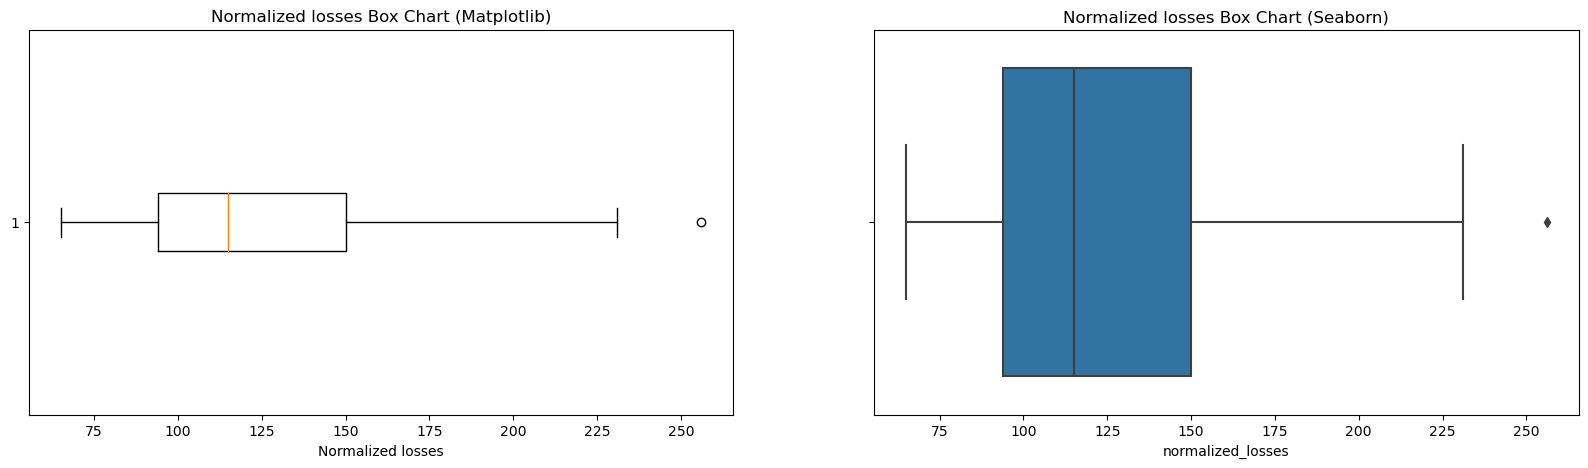

In [7]:
print(df['normalized_losses'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['normalized_losses'], inplace=True)
df['normalized_losses'] = df['normalized_losses'].astype(float)
plt.boxplot(df['normalized_losses'], vert=False)
plt.xlabel('Normalized losses')
plt.title('Normalized losses Box Chart (Matplotlib)')
plt.subplot(122)
df['normalized_losses'] = df['normalized_losses'].astype('float')
df_normalized_losses=df["normalized_losses"]
sns.boxplot(df_normalized_losses,orient='v')
plt.title('Normalized losses Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


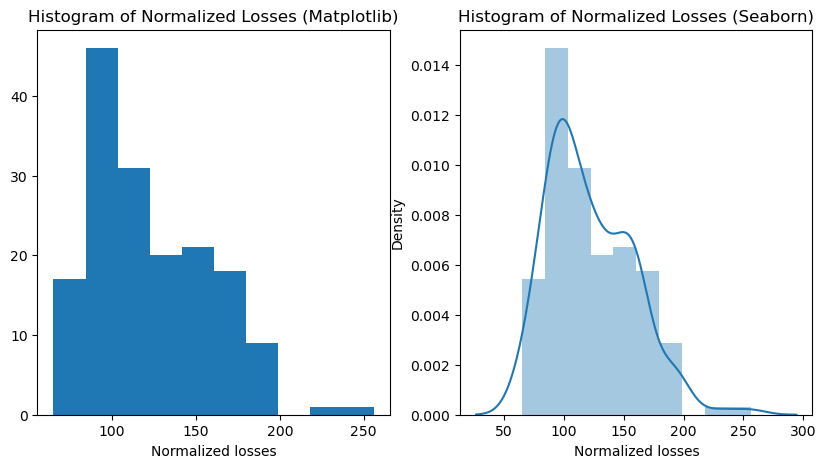

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['normalized_losses'], inplace=True)
df['normalized_losses'] = df['normalized_losses'].astype('float')
plt.hist(tuple(df['normalized_losses']))
plt.xlabel('Normalized losses')
plt.title('Histogram of Normalized Losses (Matplotlib)')
plt.subplot(122)
sns.distplot(df['normalized_losses'])
plt.xlabel('Normalized losses')
plt.title('Histogram of Normalized Losses (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for normalized losses is approximately 110. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the normalized losses attribute. Based on the histogram, the shape of the observations for the normalized losses attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### doors_num

* using value_counts function to get the nember of different number of doors of the car

count     164
unique      3
top         4
freq       95
Name: doors_num, dtype: int64
4    95
2    68
0     1
Name: doors_num, dtype: int64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


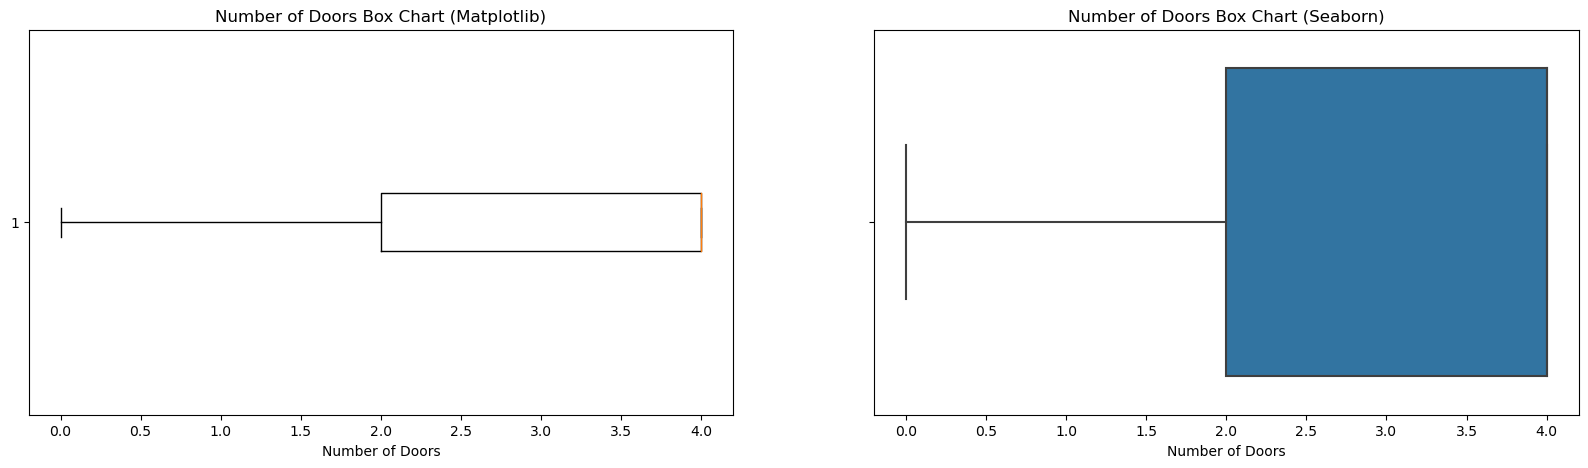

In [9]:
print(df['doors_num'].describe())
print(df['doors_num'].value_counts())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.boxplot(df['doors_num'], vert=False)
plt.xlabel('Number of Doors')
plt.title('Number of Doors Box Chart (Matplotlib)')
plt.subplot(122)
df['doors_num'] = df['doors_num'].astype('float')
df_doors_num=df["doors_num"]
sns.boxplot(df_doors_num,orient='v')
plt.xlabel('Number of Doors')
plt.title('Number of Doors Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


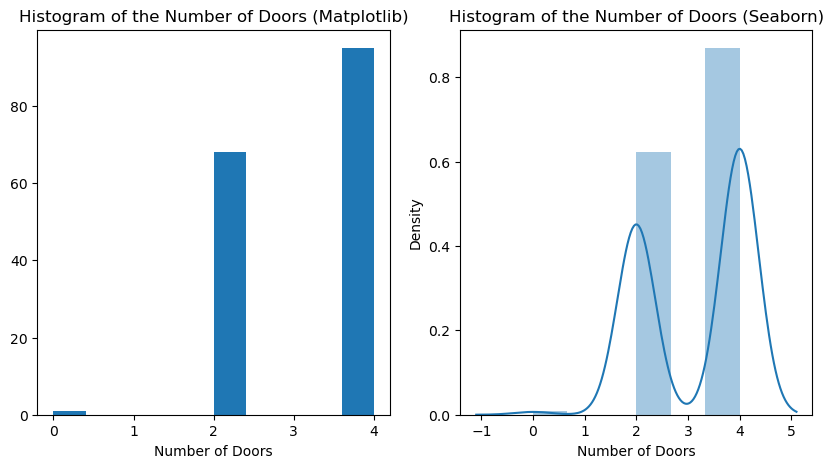

In [10]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['doors_num'], inplace=True)
df['doors_num'] = df['doors_num'].astype('float')
plt.hist(tuple(df['doors_num']))
plt.xlabel('Number of Doors')
plt.title('Histogram of the Number of Doors (Matplotlib)')
plt.subplot(122)
sns.distplot(df['doors_num'])
plt.xlabel('Number of Doors')
plt.title('Histogram of the Number of Doors (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for number of doors is approximately 4.
- Histogram: The histogram proves the result of the descriptive statistics for the number of doors attribute. Based on the histogram, it confirms that the biggest distribuion of the number of doors, for this dataset is 4, the second biggest distribuion of the number of doors is 2.

##### wheel_base

count    164.000000
mean      98.164024
std        5.120198
min       86.600000
25%       94.500000
50%       96.550000
75%      100.400000
max      115.600000
Name: wheel_base, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


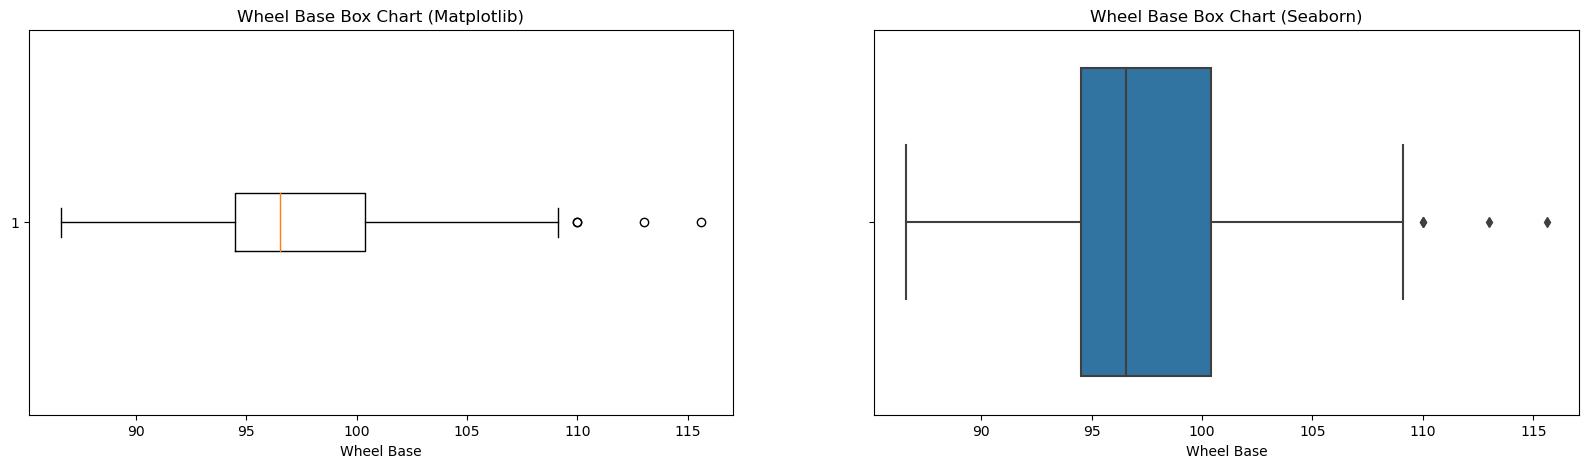

In [11]:
print(df['wheel_base'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['wheel_base'], inplace=True)
df['wheel_base'] = df['wheel_base'].astype(float)
plt.boxplot(df['wheel_base'], vert=False)
plt.xlabel('Wheel Base')
plt.title('Wheel Base Box Chart (Matplotlib)')
plt.subplot(122)
df['wheel_base'] = df['wheel_base'].astype('float')
df_wheel_base=df["wheel_base"]
sns.boxplot(df_wheel_base,orient='v')
plt.xlabel('Wheel Base')
plt.title('Wheel Base Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


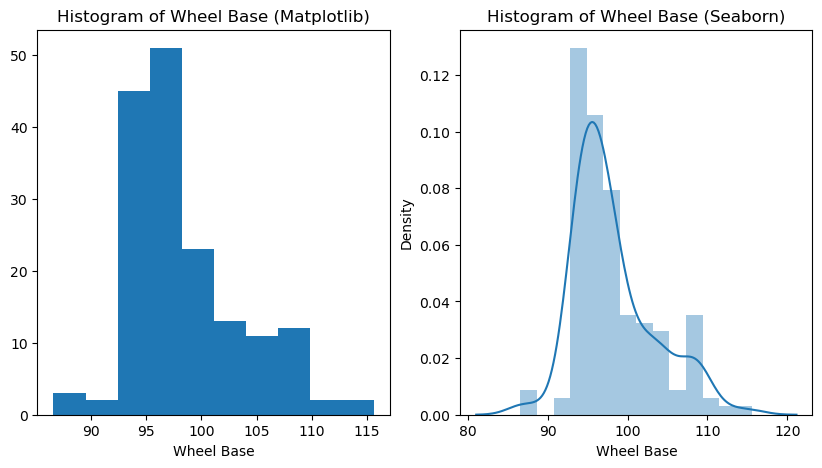

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['wheel_base'], inplace=True)
df['wheel_base'] = df['wheel_base'].astype('float')
plt.hist(tuple(df['wheel_base']))
plt.xlabel('Wheel Base')
plt.title('Histogram of Wheel Base (Matplotlib)')
plt.subplot(122)
sns.distplot(df['wheel_base'])
plt.xlabel('Wheel Base')
plt.title('Histogram of Wheel Base (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for wheel base is approximately 98. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the wheel base attribute. Based on the histogram, the shape of the observations for the wheel base attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### length

count    164.000000
mean     172.238415
std       11.417833
min      141.100000
25%      165.675000
50%      172.000000
75%      177.800000
max      202.600000
Name: length, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


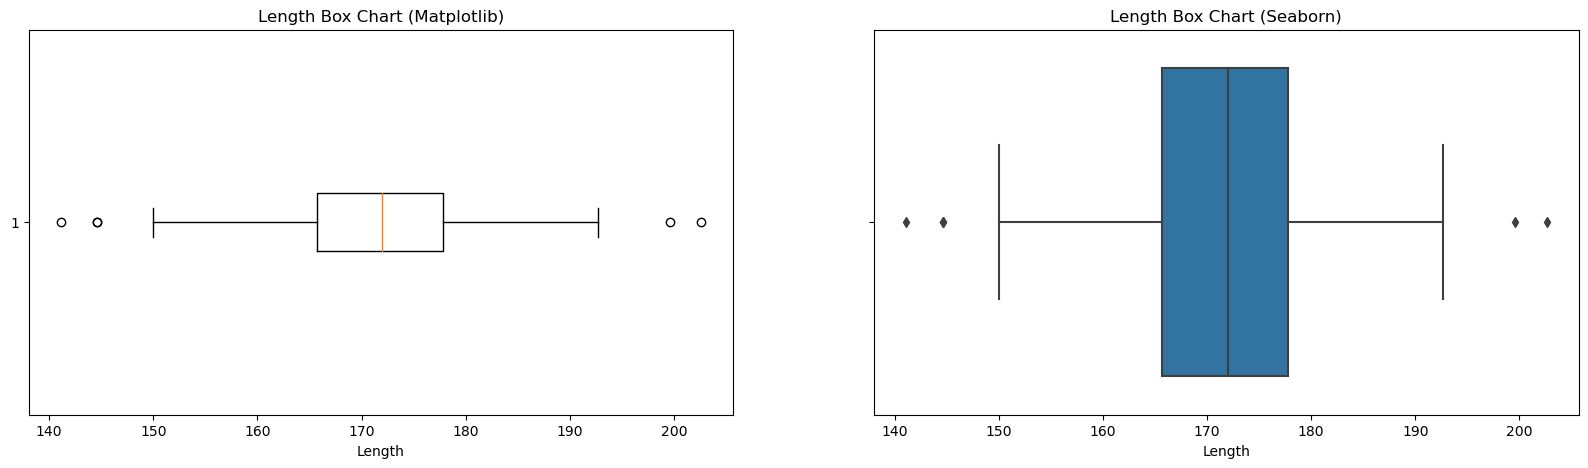

In [13]:
print(df['length'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['length'], inplace=True)
df['length'] = df['length'].astype(float)
plt.boxplot(df['length'], vert=False)
plt.xlabel('Length')
plt.title('Length Box Chart (Matplotlib)')
plt.subplot(122)
df['length'] = df['length'].astype('float')
df_length=df["length"]
sns.boxplot(df_length,orient='v')
plt.xlabel('Length')
plt.title('Length Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


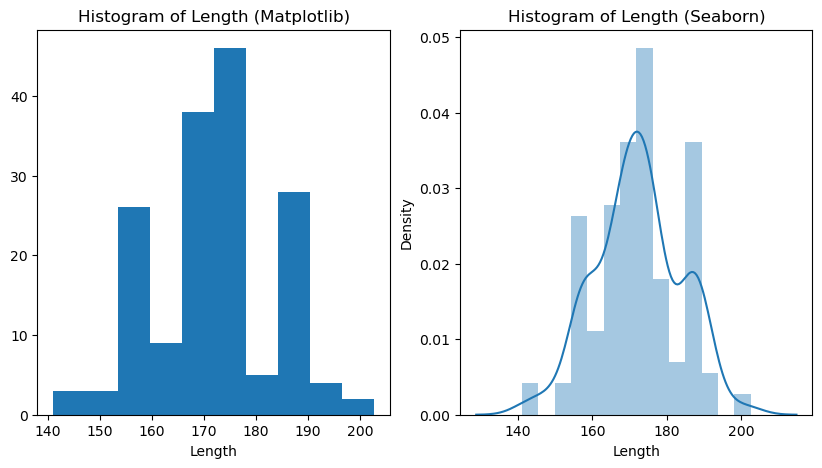

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['length'], inplace=True)
df['length'] = df['length'].astype('float')
plt.hist(tuple(df['length']))
plt.xlabel('Length')
plt.title('Histogram of Length (Matplotlib)')
plt.subplot(122)
sns.distplot(df['length'])
plt.xlabel('Length')
plt.title('Histogram of Length (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for length is approximately 172. In addition, it gives us an idea that there are some outliers and extreme values at both the higher and lower end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the wheel base attribute.

##### width

count    164.000000
mean      65.598780
std        1.923028
min       60.300000
25%       64.000000
50%       65.400000
75%       66.500000
max       71.700000
Name: width, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


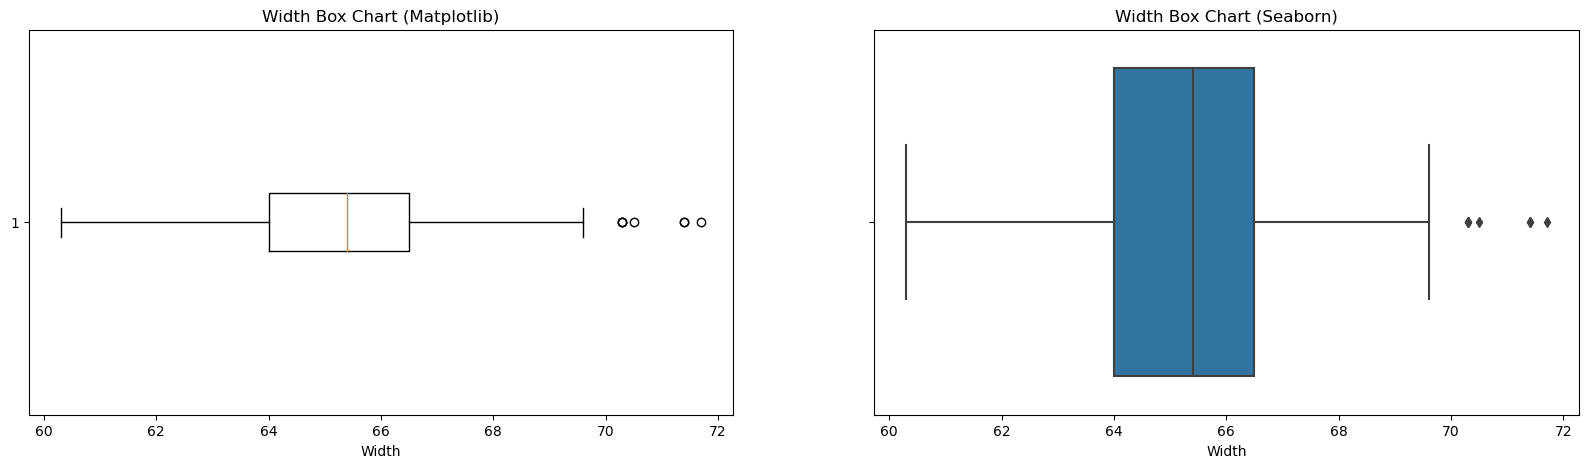

In [15]:
print(df['width'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['width'], inplace=True)
df['width'] = df['width'].astype(float)
plt.boxplot(df['width'], vert=False)
plt.xlabel('Width')
plt.title('Width Box Chart (Matplotlib)')
plt.subplot(122)
df['width'] = df['width'].astype('float')
df_width=df["width"]
sns.boxplot(df_width,orient='v')
plt.xlabel('Width')
plt.title('Width Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


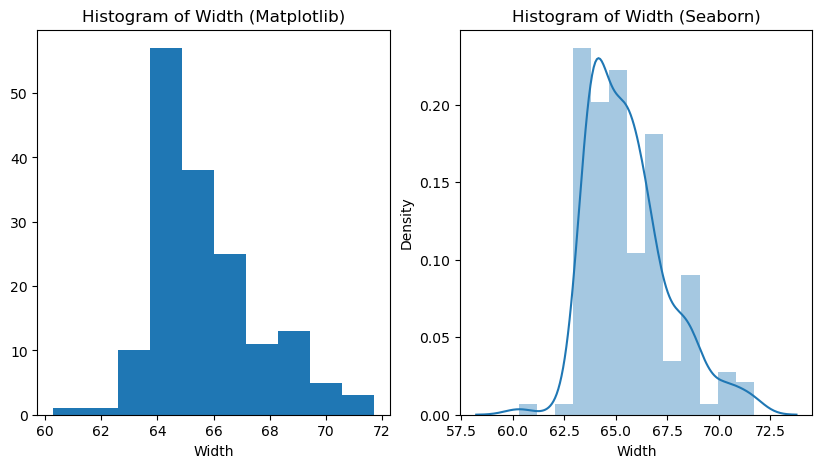

In [16]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['width'], inplace=True)
df['width'] = df['width'].astype('float')
plt.hist(tuple(df['width']))
plt.xlabel('Width')
plt.title('Histogram of Width (Matplotlib)')
plt.subplot(122)
sns.distplot(df['width'])
plt.xlabel('Width')
plt.title('Histogram of Width (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for width is approximately 65. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the width attribute. Based on the histogram, the shape of the observations for the width attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### curb_weight

count     164.000000
mean     2458.274390
std       475.087068
min      1488.000000
25%      2090.750000
50%      2367.500000
75%      2785.500000
max      4066.000000
Name: curb_weight, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


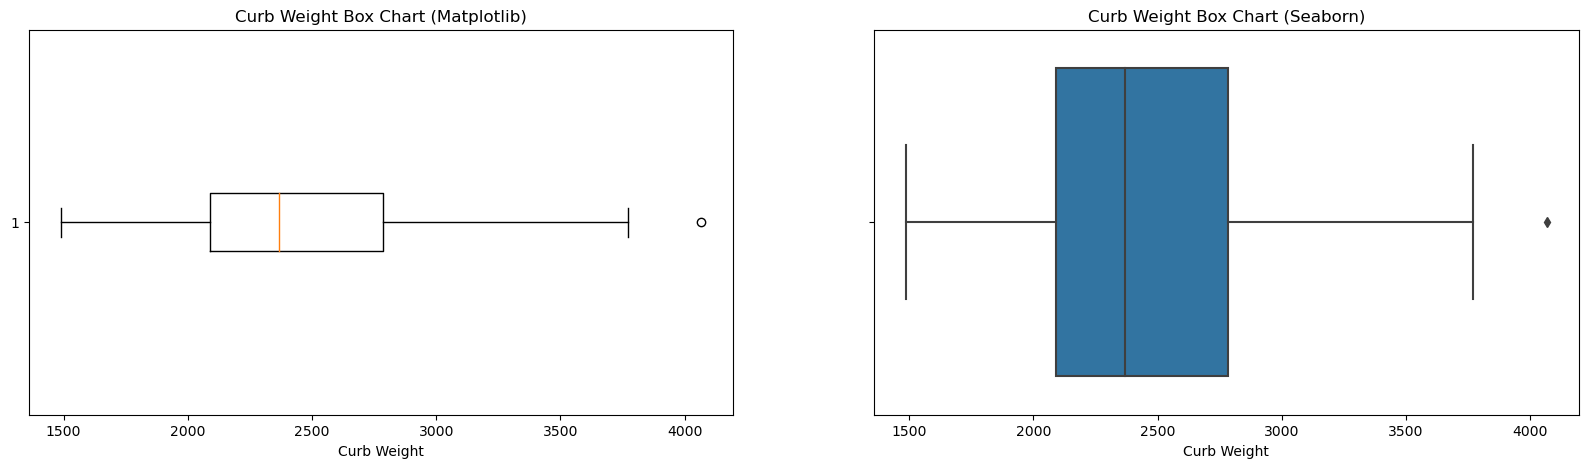

In [17]:
print(df['curb_weight'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['curb_weight'], inplace=True)
df['curb_weight'] = df['curb_weight'].astype(float)
plt.boxplot(df['curb_weight'], vert=False)
plt.xlabel('Curb Weight')
plt.title('Curb Weight Box Chart (Matplotlib)')
plt.subplot(122)
df['curb_weight'] = df['curb_weight'].astype('float')
df_curb_weight=df["curb_weight"]
sns.boxplot(df_curb_weight,orient='v')
plt.xlabel('Curb Weight')
plt.title('Curb Weight Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


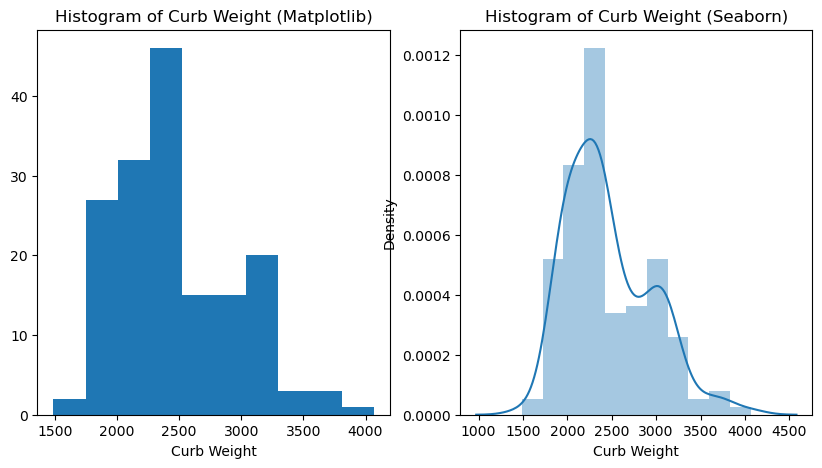

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['curb_weight'], inplace=True)
df['curb_weight'] = df['curb_weight'].astype('float')
plt.hist(tuple(df['curb_weight']))
plt.xlabel('Curb Weight')
plt.title('Histogram of Curb Weight (Matplotlib)')
plt.subplot(122)
sns.distplot(df['curb_weight'])
plt.xlabel('Curb Weight')
plt.title('Histogram of Curb Weight (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for curb weight is approximately 2400. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the curb weight attribute. Based on the histogram, the shape of the observations for the curb weight attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### height

count    164.000000
mean      53.774390
std        2.343942
min       49.400000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: height, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


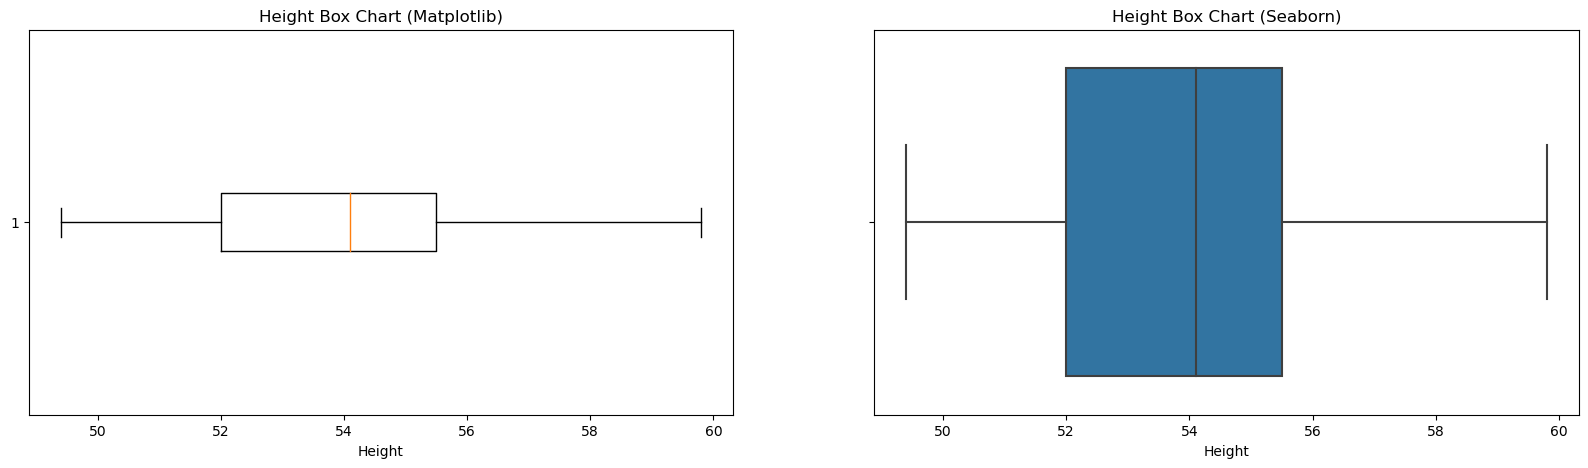

In [19]:
print(df['height'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['height'], inplace=True)
df['height'] = df['height'].astype(float)
plt.boxplot(df['height'], vert=False)
plt.xlabel('Height')
plt.title('Height Box Chart (Matplotlib)')
plt.subplot(122)
df['height'] = df['height'].astype('float')
df_height=df["height"]
sns.boxplot(df_height,orient='v')
plt.xlabel('Height')
plt.title('Height Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


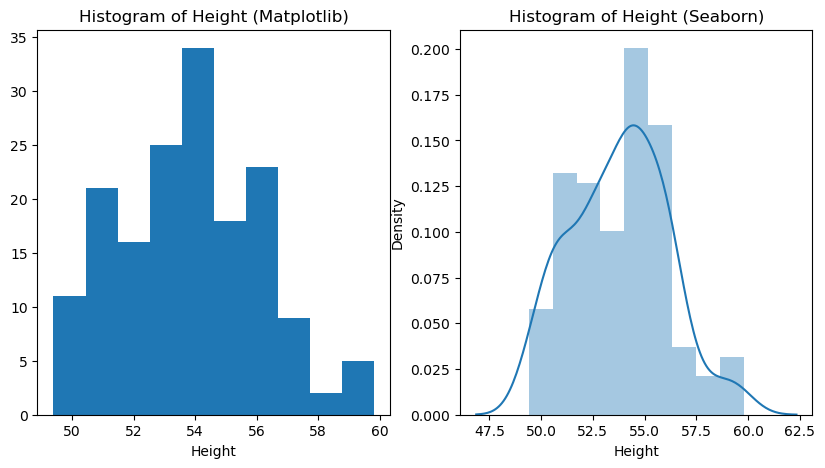

In [20]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['height'], inplace=True)
df['height'] = df['height'].astype('float')
plt.hist(tuple(df['height']))
plt.xlabel('Height')
plt.title('Histogram of Height (Matplotlib)')
plt.subplot(122)
sns.distplot(df['height'])
plt.xlabel('Height')
plt.title('Histogram of Height (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for height is approximately 54. 

- Histogram: The histogram proves the result of the descriptive statistics for the height attribute. 

##### cylinders_num
* using value_counts function to get the nember of different number of cylinders of the car

count     164
unique      6
top         4
freq      137
Name: cylinders_num, dtype: int64
4    137
6     14
5      7
2      4
3      1
8      1
Name: cylinders_num, dtype: int64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


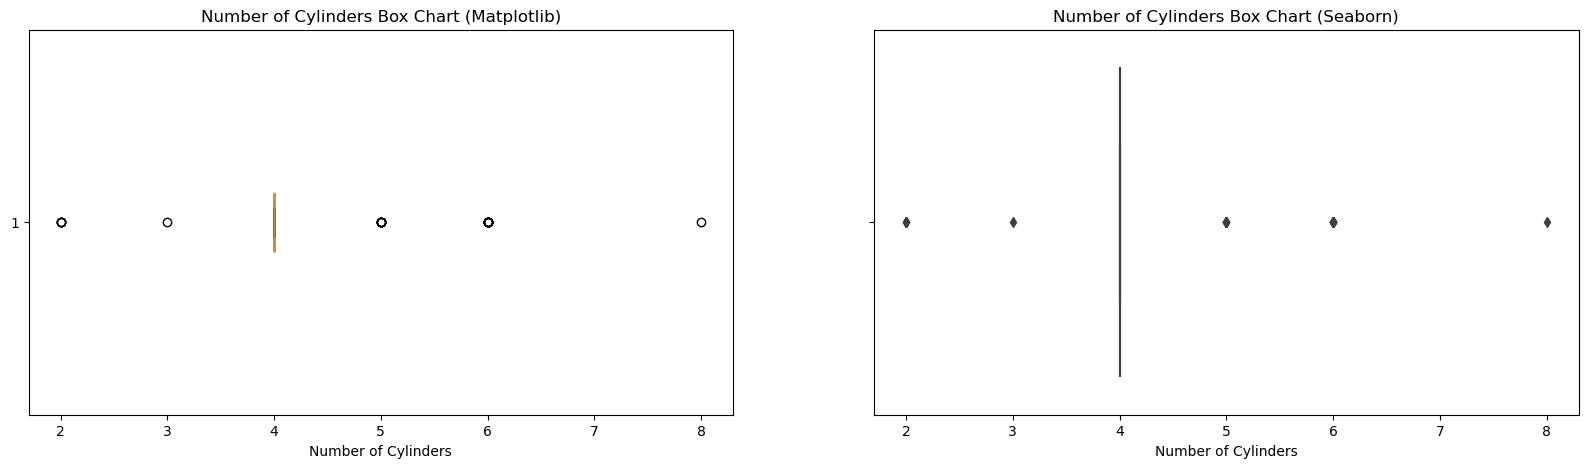

In [21]:
print(df['cylinders_num'].describe())
print(df['cylinders_num'].value_counts())
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.boxplot(df['cylinders_num'], vert=False)
plt.xlabel('Number of Cylinders')
plt.title('Number of Cylinders Box Chart (Matplotlib)')
plt.subplot(122)
df['cylinders_num'] = df['cylinders_num'].astype('float')
df_cylinders_num=df["cylinders_num"]
sns.boxplot(df_cylinders_num,orient='v')
plt.xlabel('Number of Cylinders')
plt.title('Number of Cylinders Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


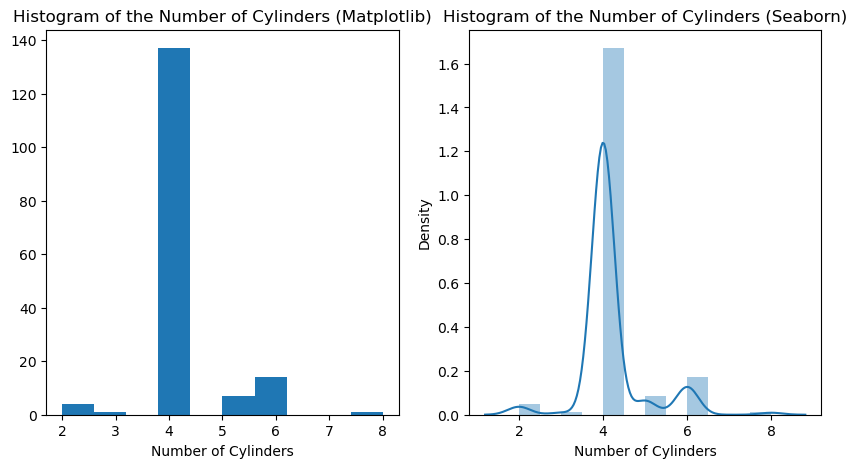

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['cylinders_num'], inplace=True)
df['cylinders_num'] = df['cylinders_num'].astype('float')
plt.hist(tuple(df['cylinders_num']))
plt.xlabel('Number of Cylinders')
plt.title('Histogram of the Number of Cylinders (Matplotlib)')
plt.subplot(122)
sns.distplot(df['cylinders_num'])
plt.xlabel('Number of Cylinders')
plt.title('Histogram of the Number of Cylinders (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for the number of cylinders is approximately 4. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.
- Histogram: The histogram proves the result of the descriptive statistics for the number of cylinders attribute. Based on the histogram, it confirms that the biggest distribuion of the number of cylinders, for this dataset is 4, the second biggest distribuion of the number of cylinders is 6. And the shape of the observations for the number of cylinders attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### engine_size

count    164.000000
mean     117.957317
std       30.896294
min       61.000000
25%       97.000000
50%      109.000000
75%      131.750000
max      258.000000
Name: engine_size, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


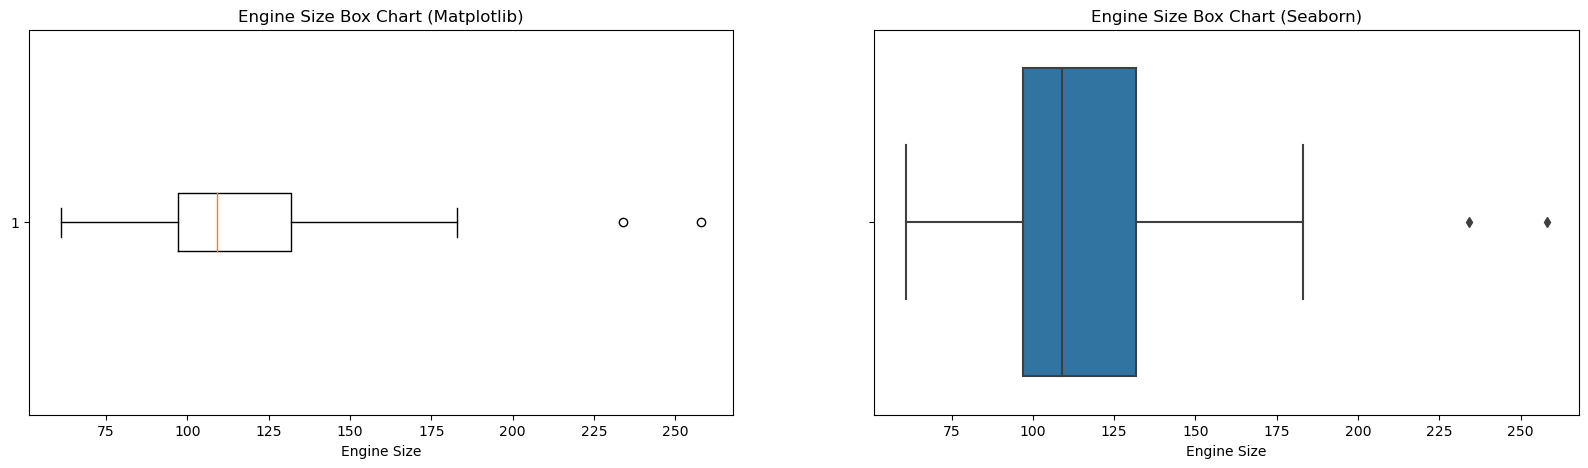

In [23]:
print(df['engine_size'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['engine_size'], inplace=True)
df['engine_size'] = df['engine_size'].astype(float)
plt.boxplot(df['engine_size'], vert=False)
plt.xlabel('Engine Size')
plt.title('Engine Size Box Chart (Matplotlib)')
plt.subplot(122)
df['engine_size'] = df['engine_size'].astype('float')
df_engine_size=df["engine_size"]
sns.boxplot(df_engine_size,orient='v')
plt.xlabel('Engine Size')
plt.title('Engine Size Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


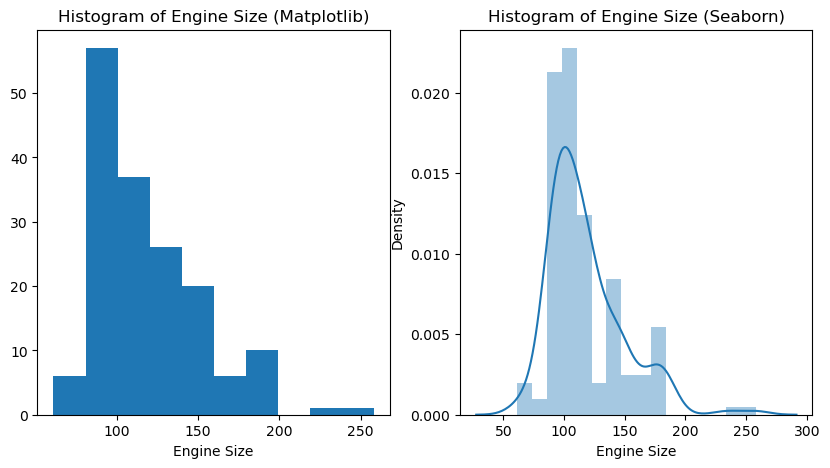

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['engine_size'], inplace=True)
df['engine_size'] = df['engine_size'].astype('float')
plt.hist(tuple(df['engine_size']))
plt.xlabel('Engine Size')
plt.title('Histogram of Engine Size (Matplotlib)')
plt.subplot(122)
sns.distplot(df['engine_size'])
plt.xlabel('Engine Size')
plt.title('Histogram of Engine Size (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for engine size is approximately 110. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the engine size attribute. Based on the histogram, the shape of the observations for the engine size attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### bore

count      160
unique      33
top       3.62
freq        20
Name: bore, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


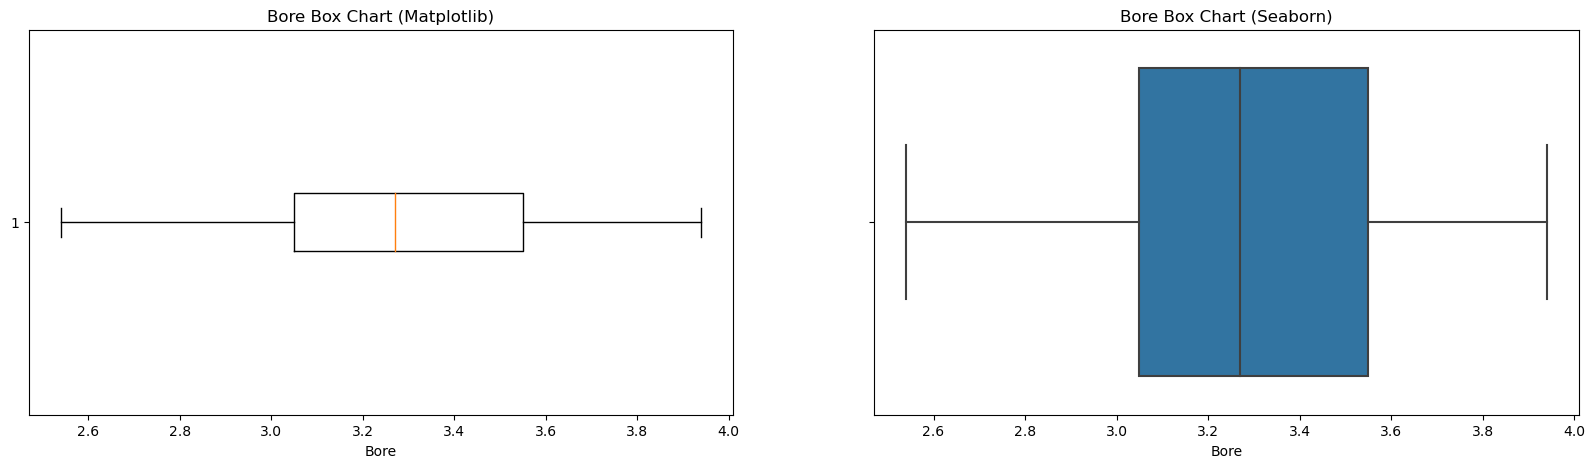

In [25]:
print(df['bore'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['bore'], inplace=True)
df['bore'] = df['bore'].astype(float)
plt.boxplot(df['bore'], vert=False)
plt.xlabel('Bore')
plt.title('Bore Box Chart (Matplotlib)')
plt.subplot(122)
df['bore'] = df['bore'].astype('float')
df_bore=df["bore"]
sns.boxplot(df_bore,orient='v')
plt.xlabel('Bore')
plt.title('Bore Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


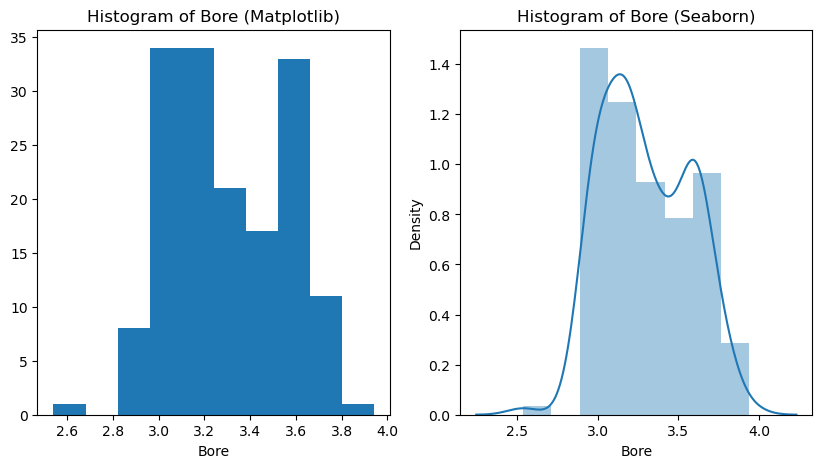

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['bore'], inplace=True)
df['bore'] = df['bore'].astype('float')
plt.hist(tuple(df['bore']))
plt.xlabel('Bore')
plt.title('Histogram of Bore (Matplotlib)')
plt.subplot(122)
sns.distplot(df['bore'])
plt.xlabel('Bore')
plt.title('Histogram of Bore (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for bore is approximately 3.2. 

- Histogram: The histogram proves the result of the descriptive statistics for the height attribute. 

##### stroke

count      160
unique      31
top       3.03
freq        14
Name: stroke, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


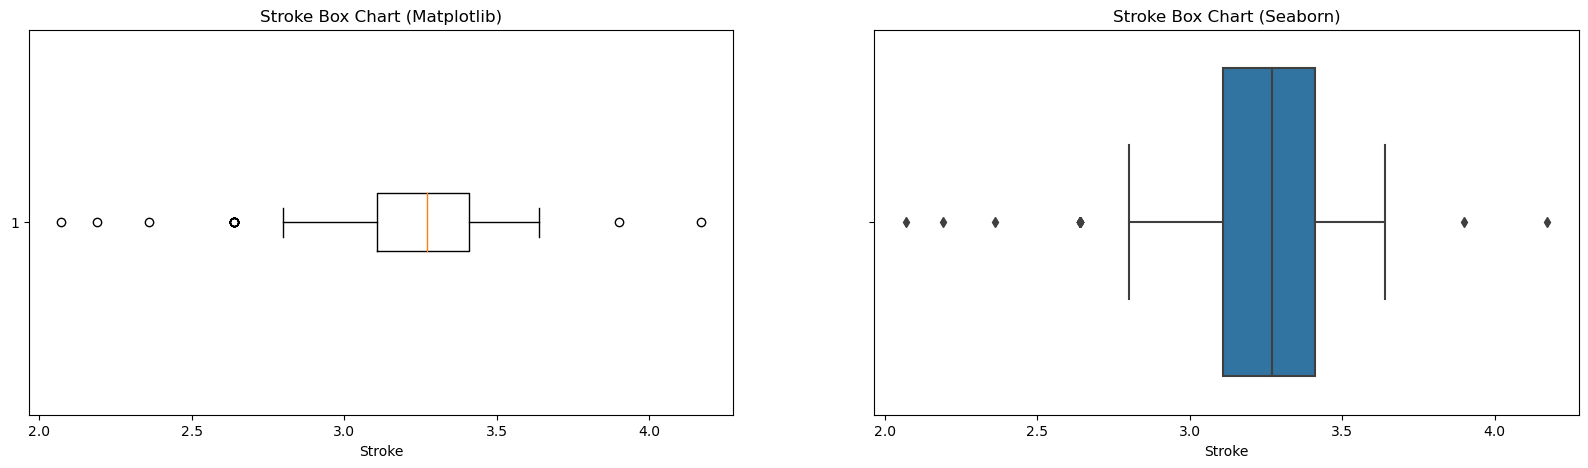

In [27]:
print(df['stroke'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['stroke'], inplace=True)
df['stroke'] = df['stroke'].astype(float)
plt.boxplot(df['stroke'], vert=False)
plt.xlabel('Stroke')
plt.title('Stroke Box Chart (Matplotlib)')
plt.subplot(122)
df['stroke'] = df['stroke'].astype('float')
df_stroke=df["stroke"]
sns.boxplot(df_stroke,orient='v')
plt.xlabel('Stroke')
plt.title('Stroke Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


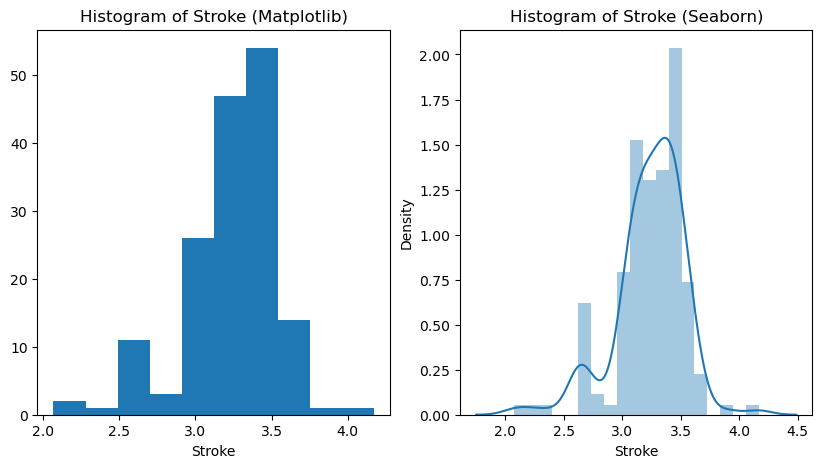

In [28]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['stroke'], inplace=True)
df['stroke'] = df['stroke'].astype('float')
plt.hist(tuple(df['stroke']))
plt.xlabel('Stroke')
plt.title('Histogram of Stroke (Matplotlib)')
plt.subplot(122)
sns.distplot(df['stroke'])
plt.xlabel('Stroke')
plt.title('Histogram of Stroke (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for stroke is approximately 3.3. In addition, it gives us an idea that there are more outliers and extreme values at the lower end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the stroke attribute. Based on the histogram, the shape of the observations for the stroke attribute is skewed to the left. This is because there were a lot of outliers/extreme values at the lower end of the tail which is also what the boxplot showed us.

##### compression_ratio

count    160.000000
mean      10.145125
std        3.882507
min        7.000000
25%        8.700000
50%        9.000000
75%        9.400000
max       23.000000
Name: compression_ratio, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


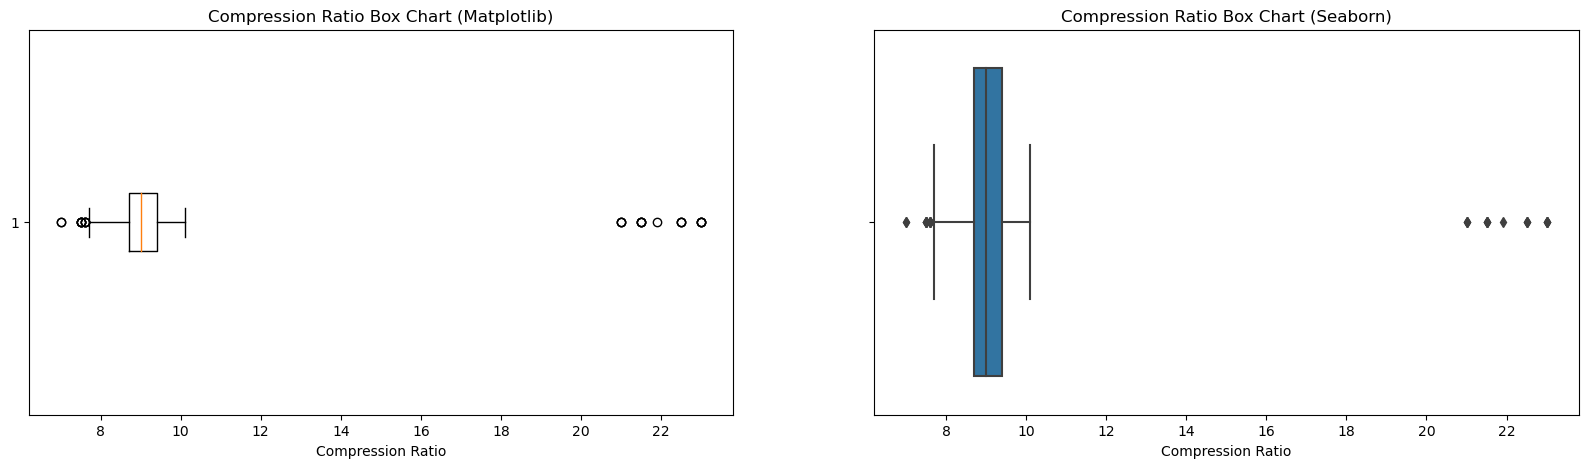

In [29]:
print(df['compression_ratio'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['compression_ratio'], inplace=True)
df['compression_ratio'] = df['compression_ratio'].astype(float)
plt.boxplot(df['compression_ratio'], vert=False)
plt.xlabel('Compression Ratio')
plt.title('Compression Ratio Box Chart (Matplotlib)')
plt.subplot(122)
df['compression_ratio'] = df['compression_ratio'].astype('float')
df_compression_ratio=df["compression_ratio"]
sns.boxplot(df_compression_ratio,orient='v')
plt.xlabel('Compression Ratio')
plt.title('Compression Ratio Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


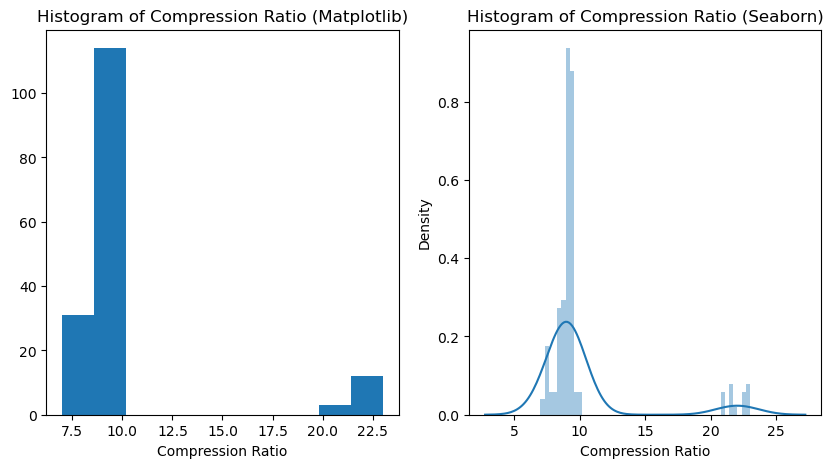

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['compression_ratio'], inplace=True)
df['compression_ratio'] = df['compression_ratio'].astype('float')
plt.hist(tuple(df['compression_ratio']))
plt.xlabel('Compression Ratio')
plt.title('Histogram of Compression Ratio (Matplotlib)')
plt.subplot(122)
sns.distplot(df['compression_ratio'])
plt.xlabel('Compression Ratio')
plt.title('Histogram of Compression Ratio (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for compression ratio is approximately 9. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the compression ratio attribute. Based on the histogram, the shape of the observations for the compression ratio attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### horsepower

count     160
unique     48
top        68
freq       18
Name: horsepower, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


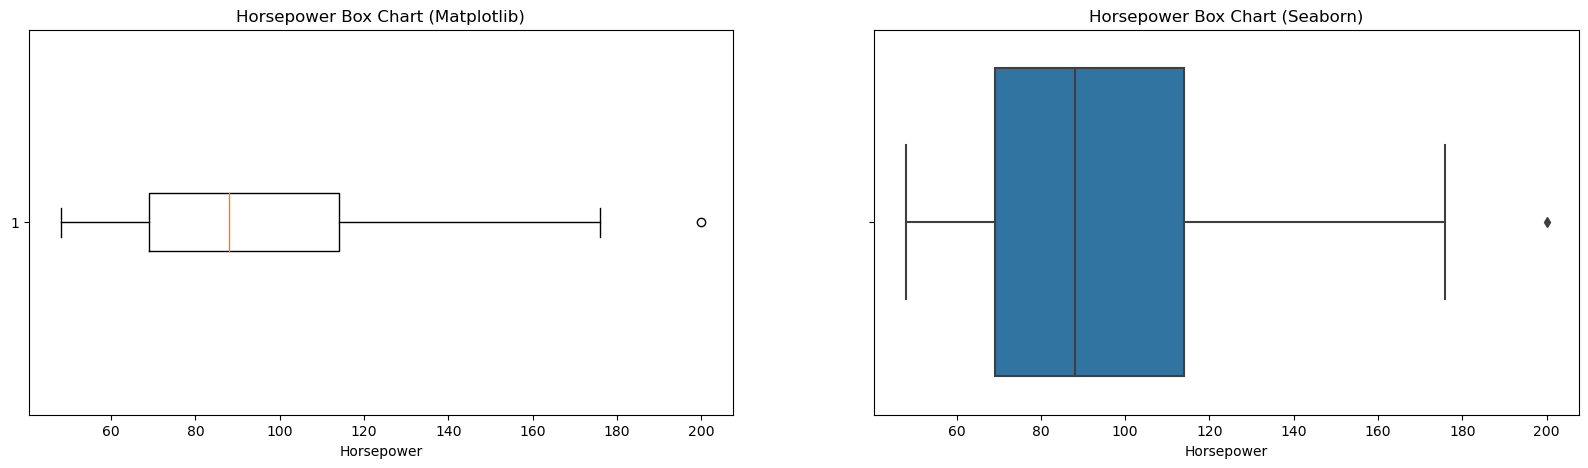

In [31]:
print(df['horsepower'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['horsepower'], inplace=True)
df['horsepower'] = df['horsepower'].astype(float)
plt.boxplot(df['horsepower'], vert=False)
plt.xlabel('Horsepower')
plt.title('Horsepower Box Chart (Matplotlib)')
plt.subplot(122)
df['horsepower'] = df['horsepower'].astype('float')
df_horsepower=df["horsepower"]
sns.boxplot(df_horsepower,orient='v')
plt.xlabel('Horsepower')
plt.title('Horsepower Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


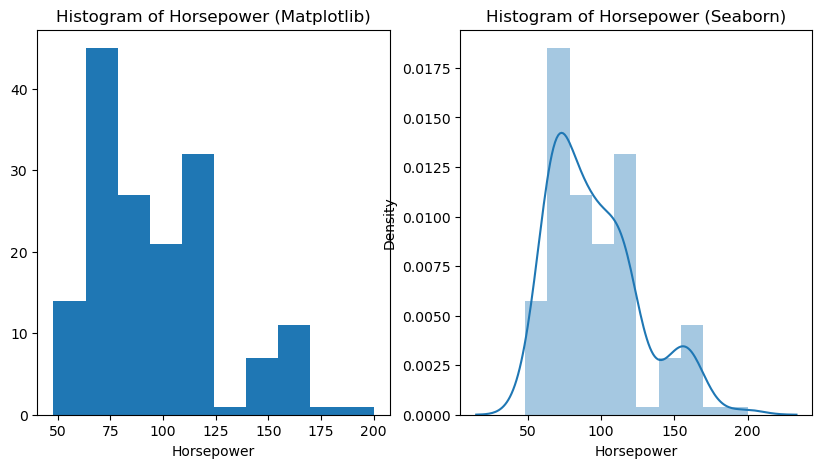

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['horsepower'], inplace=True)
df['horsepower'] = df['horsepower'].astype('float')
plt.hist(tuple(df['horsepower']))
plt.xlabel('Horsepower')
plt.title('Histogram of Horsepower (Matplotlib)')
plt.subplot(122)
sns.distplot(df['horsepower'])
plt.xlabel('Horsepower')
plt.title('Histogram of Horsepower (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for horsepower is approximately 90. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the horsepower attribute. Based on the histogram, the shape of the observations for the horsepower attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### peak_rpm

count      160
unique      20
top       4800
freq        35
Name: peak_rpm, dtype: object


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


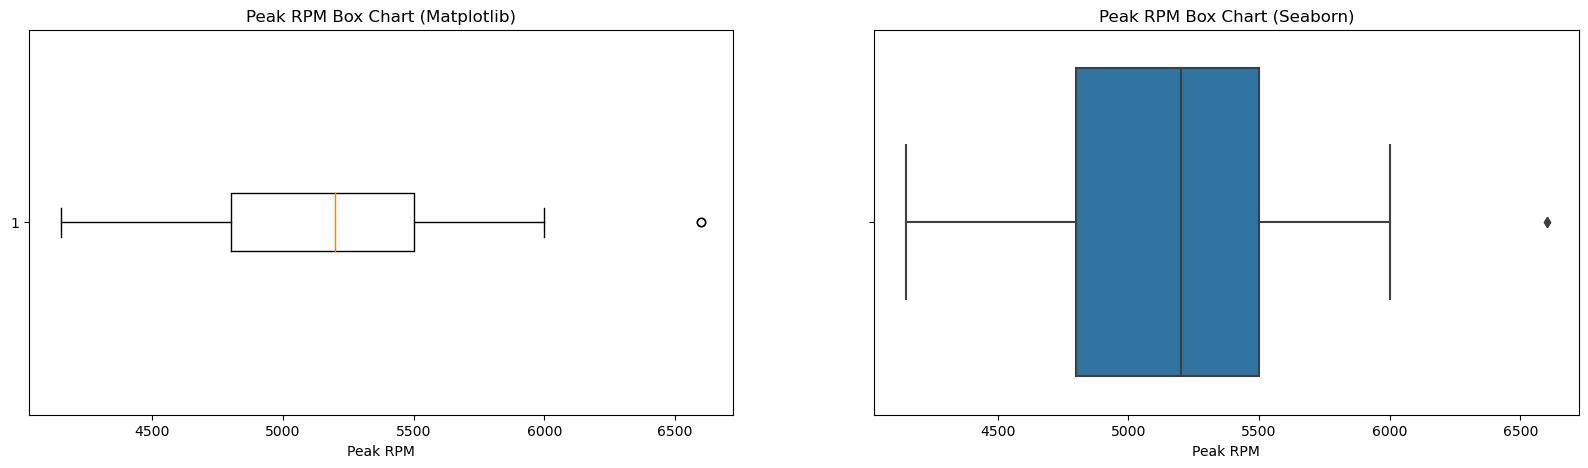

In [33]:
print(df['peak_rpm'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['peak_rpm'], inplace=True)
df['peak_rpm'] = df['peak_rpm'].astype(float)
plt.boxplot(df['peak_rpm'], vert=False)
plt.xlabel('Peak RPM')
plt.title('Peak RPM Box Chart (Matplotlib)')
plt.subplot(122)
df['peak_rpm'] = df['peak_rpm'].astype('float')
df_symboling=df["peak_rpm"]
sns.boxplot(df_symboling,orient='v')
plt.xlabel('Peak RPM')
plt.title('Peak RPM Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


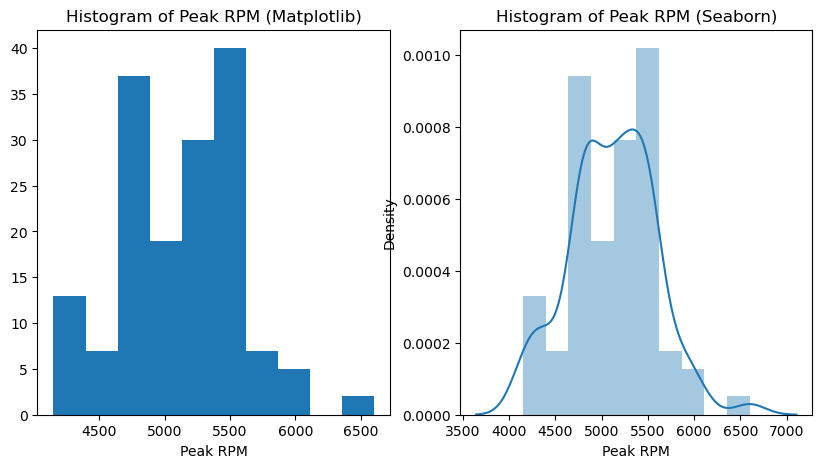

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['peak_rpm'], inplace=True)
df['peak_rpm'] = df['peak_rpm'].astype('float')
plt.hist(df['peak_rpm'])
plt.xlabel('Peak RPM')
plt.title('Histogram of Peak RPM (Matplotlib)')
plt.subplot(122)
sns.distplot(df['peak_rpm'])
plt.xlabel('Peak RPM')
plt.title('Histogram of Peak RPM (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for peak rpm is approximately 5200. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the peak rpm attribute. Based on the histogram, the shape of the observations for the peak rpm attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### highway_mpg

count    160.000000
mean      32.068750
std        6.440948
min       18.000000
25%       28.000000
50%       32.000000
75%       37.000000
max       54.000000
Name: highway_mpg, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


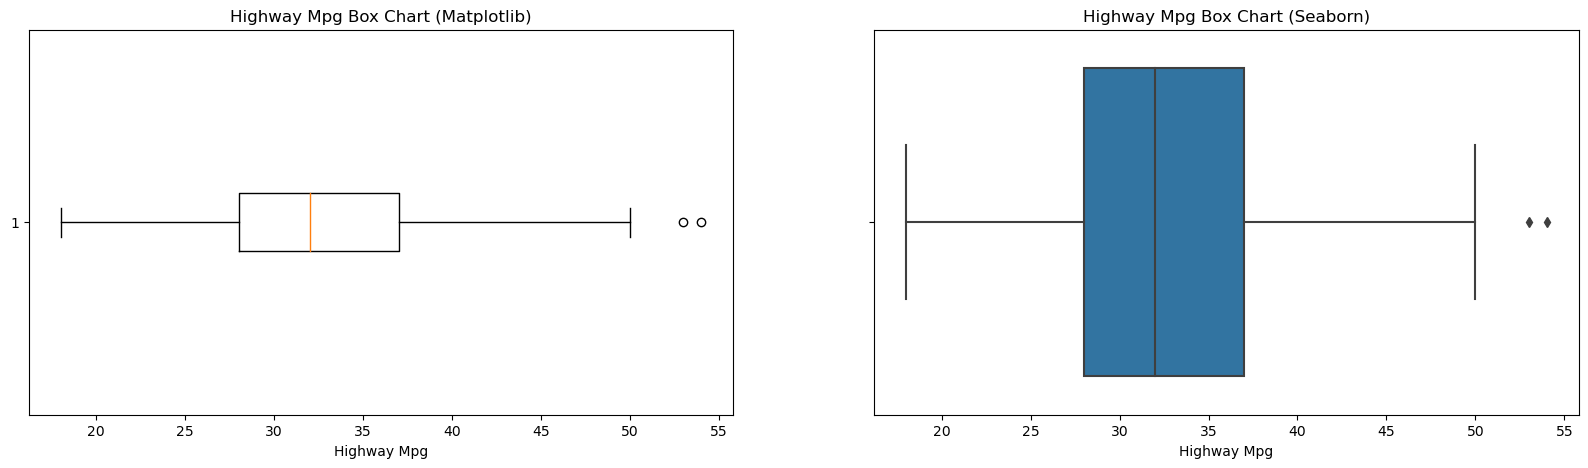

In [35]:
print(df['highway_mpg'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['highway_mpg'], inplace=True)
df['highway_mpg'] = df['highway_mpg'].astype(float)
plt.boxplot(df['highway_mpg'], vert=False)
plt.xlabel('Highway Mpg')
plt.title('Highway Mpg Box Chart (Matplotlib)')
plt.subplot(122)
df['highway_mpg'] = df['highway_mpg'].astype('float')
df_highway_mpg=df["highway_mpg"]
sns.boxplot(df_highway_mpg,orient='v')
plt.xlabel('Highway Mpg')
plt.title('Highway Mpg Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


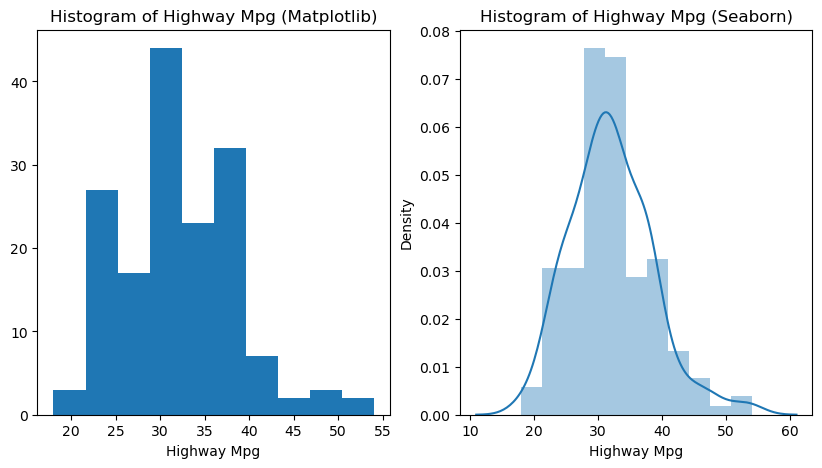

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['highway_mpg'], inplace=True)
df['highway_mpg'] = df['highway_mpg'].astype('float')
plt.hist(df['highway_mpg'])
plt.xlabel('Highway Mpg')
plt.title('Histogram of Highway Mpg (Matplotlib)')
plt.subplot(122)
sns.distplot(df['highway_mpg'])
plt.xlabel('Highway Mpg')
plt.title('Histogram of Highway Mpg (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for highway mpg is approximately 32. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the highway mpg attribute. Based on the histogram, the shape of the observations for the highway mpg attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### city_mpg

count    160.000000
mean      26.506250
std        6.081208
min       15.000000
25%       23.000000
50%       26.000000
75%       31.000000
max       49.000000
Name: city_mpg, dtype: float64


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


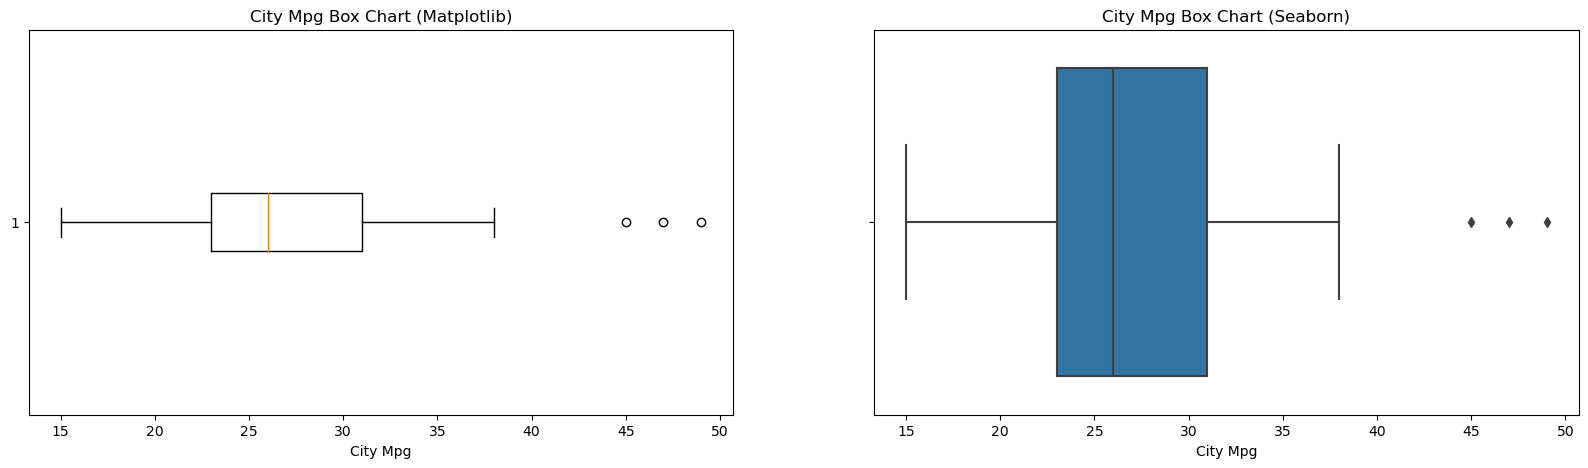

In [37]:
print(df['city_mpg'].describe())
plt.figure(figsize=(20,5))
plt.subplot(121)
df.dropna(subset=['city_mpg'], inplace=True)
df['city_mpg'] = df['city_mpg'].astype(float)
plt.boxplot(df['city_mpg'], vert=False)
plt.xlabel('City Mpg')
plt.title('City Mpg Box Chart (Matplotlib)')
plt.subplot(122)
df['city_mpg'] = df['city_mpg'].astype('float')
df_city_mpg=df["city_mpg"]
sns.boxplot(df_city_mpg,orient='v')
plt.xlabel('City Mpg')
plt.title('City Mpg Box Chart (Seaborn)')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


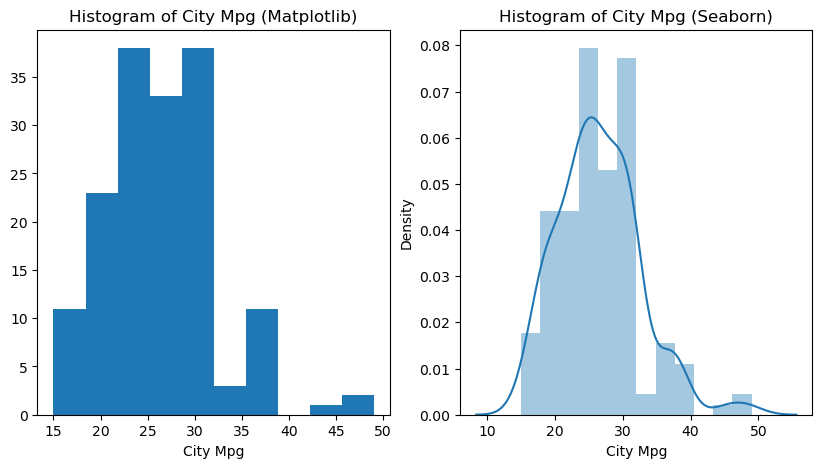

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(121)
df.dropna(subset=['city_mpg'], inplace=True)
df['city_mpg'] = df['city_mpg'].astype('float')
plt.hist(df['city_mpg'])
plt.xlabel('City Mpg')
plt.title('Histogram of City Mpg (Matplotlib)')
plt.subplot(122)
sns.distplot(df['city_mpg'])
plt.xlabel('City Mpg')
plt.title('Histogram of City Mpg (Seaborn)')
plt.show()

**Discussion of Result:**

- Boxplot: The boxplot shows that the median for city mpg is approximately 26. In addition, it gives us an idea that there are more outliers and extreme values at the higher end of its tail.

- Histogram: The histogram proves the result of the descriptive statistics for the city mpg attribute. Based on the histogram, the shape of the observations for the city mpg attribute is skewed to the right. This is because there were a lot of outliers/extreme values at the higher end of the tail which is also what the boxplot showed us.

##### Categorical Variable
* using describe function to get a data summary
* using value_counts function to get the number of different groups
* using plot(kind='bar') function in matplotlib.pyplot library and using countplot function in seaborn library to draw the bar plot
* getting discussion of result

##### make

count        160
unique        18
top       toyota
freq          31
Name: make, dtype: object


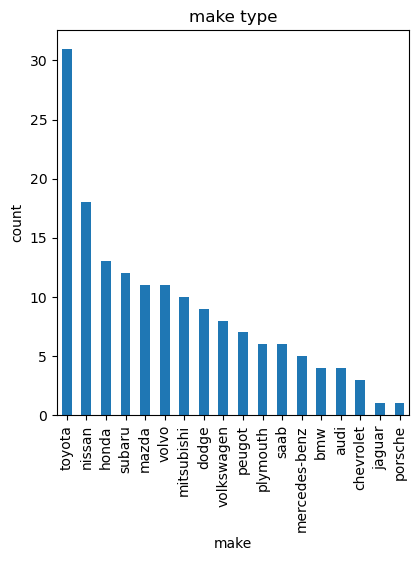

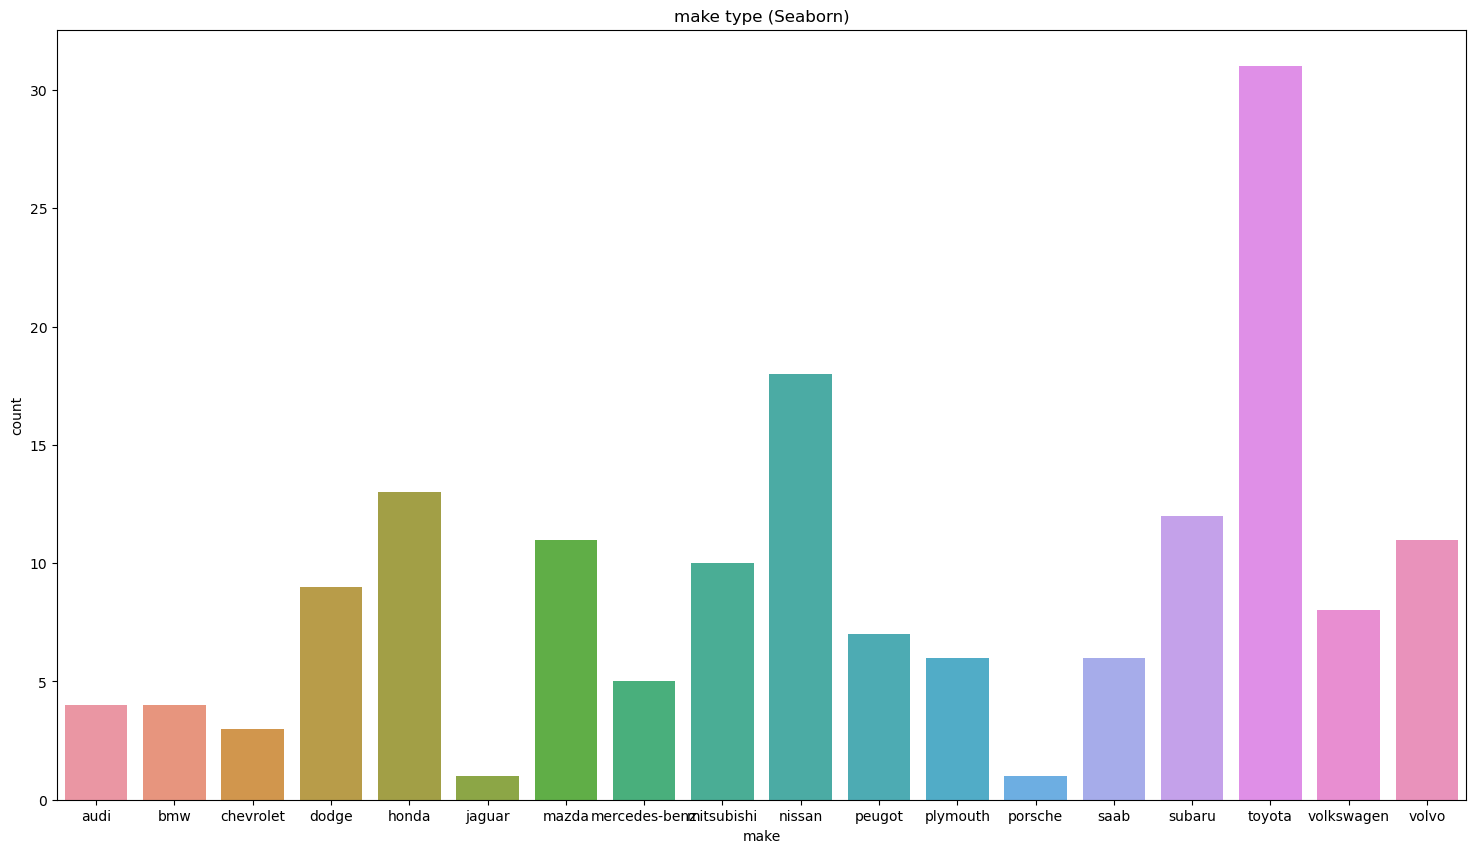

In [39]:
print(df['make'].describe())
make_counts = df['make'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
make_counts.plot(kind='bar')
plt.title('make type')
plt.xlabel('make')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(40,10))
plt.subplot(121)
sns.countplot(x='make',data=df)
plt.title('make type (Seaborn)')
plt.xlabel('make')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of make type of cars, for this dataset is toyota, the second one is nissan, the third one is mazda, and other types are in a comparatively low usage rate.

##### fueltype

count     160
unique      2
top       gas
freq      145
Name: fueltype, dtype: object


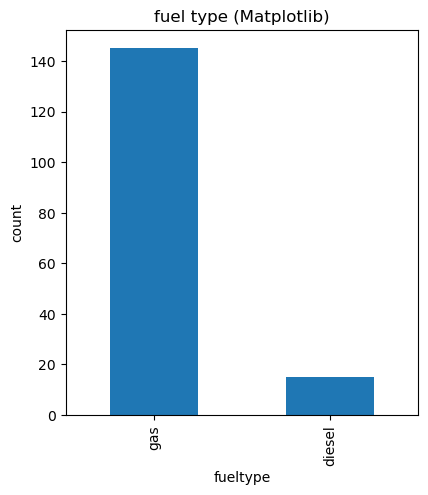

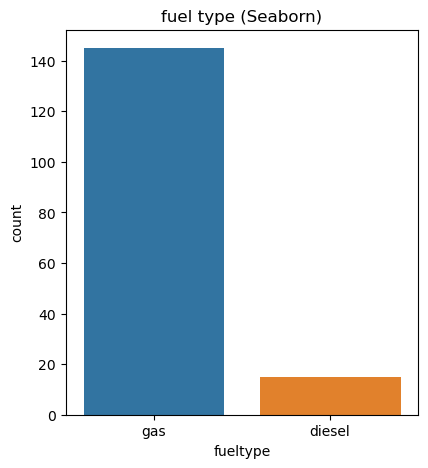

In [40]:
print(df['fueltype'].describe())
fueltype_counts = df['fueltype'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
fueltype_counts.plot(kind='bar')
plt.title('fuel type (Matplotlib)')
plt.xlabel('fueltype')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='fueltype',data=df)
plt.title('fuel type (Seaborn)')
plt.xlabel('fueltype')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of fuel type, for this dataset is gas type, the other one (diesel type) is in a comparatively low usage rate.

##### aspiration

count     160
unique      2
top       std
freq      132
Name: aspiration, dtype: object


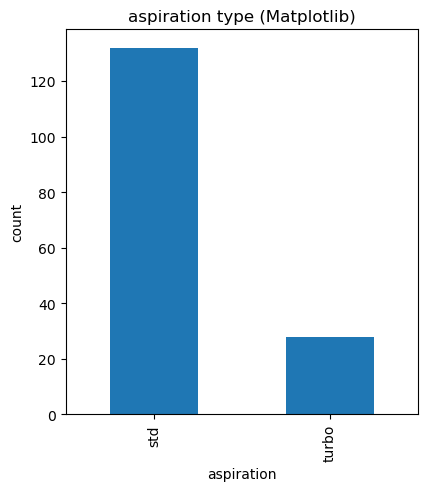

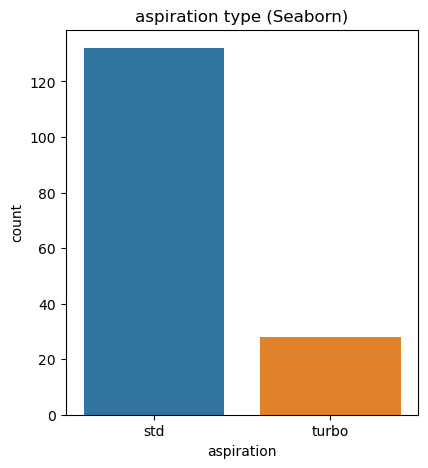

In [41]:
print(df['aspiration'].describe())
aspiration_counts = df['aspiration'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
aspiration_counts.plot(kind='bar')
plt.title('aspiration type (Matplotlib)')
plt.xlabel('aspiration')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='aspiration',data=df)
plt.title('aspiration type (Seaborn)')
plt.xlabel('aspiration')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of aspiration type, for this dataset is std type, the second one (turbo type) is in a comparatively low usage rate.

##### body_style

count       160
unique        5
top       sedan
freq         80
Name: body_style, dtype: object


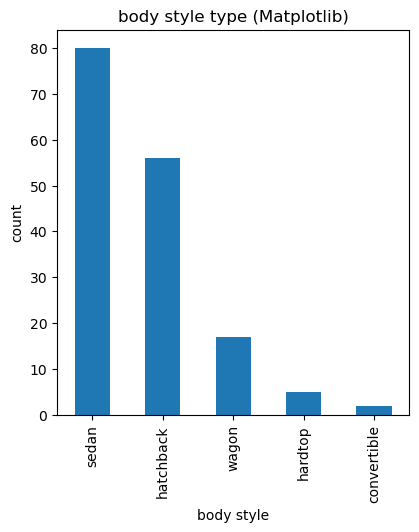

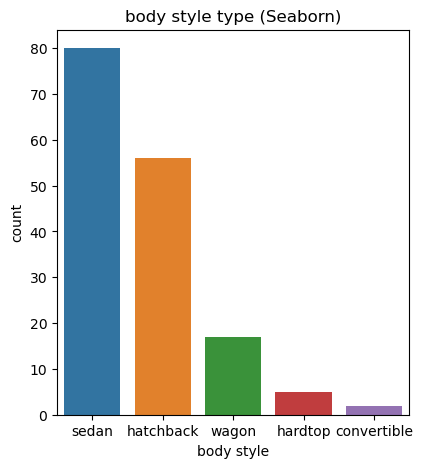

In [42]:
print(df['body_style'].describe())
body_style_counts = df['body_style'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
body_style_counts.plot(kind='bar')
plt.title('body style type (Matplotlib)')
plt.xlabel('body style')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='body_style',data=df)
plt.title('body style type (Seaborn)')
plt.xlabel('body style')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of body style type of cars, for this dataset is sedan type,then the second one is hatchback type, the others are in a comparatively low usage rate.

##### drive_wheels

count     160
unique      3
top       fwd
freq      106
Name: drive_wheels, dtype: object


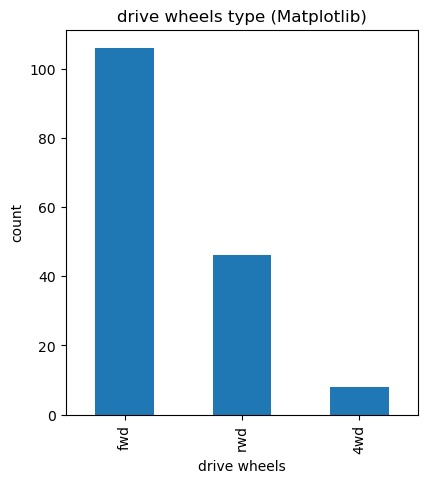

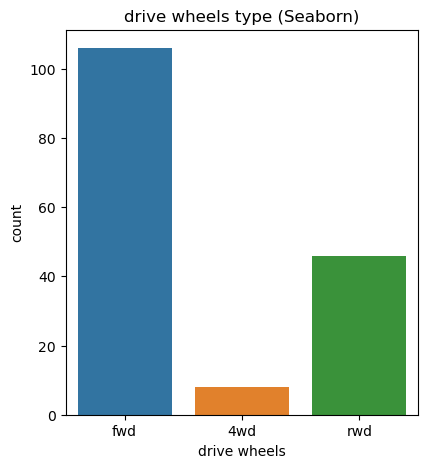

In [43]:
print(df['drive_wheels'].describe())
drive_wheels_counts = df['drive_wheels'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
drive_wheels_counts.plot(kind='bar')
plt.title('drive wheels type (Matplotlib)')
plt.xlabel('drive wheels')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='drive_wheels',data=df)
plt.title('drive wheels type (Seaborn)')
plt.xlabel('drive wheels')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of drive wheels type, for this dataset is fwd type,then the second one is rwd type, the last one is 4wd, it is in a very low usage rate.

##### engine_location

count       160
unique        1
top       front
freq        160
Name: engine_location, dtype: object


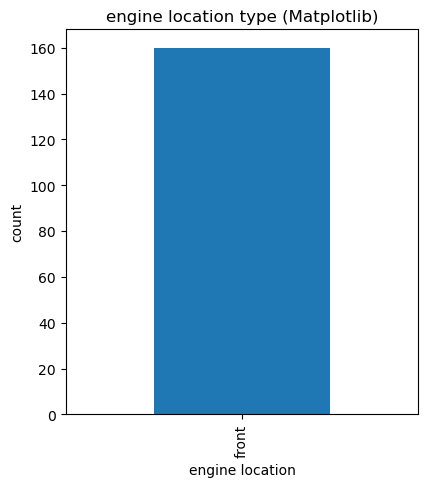

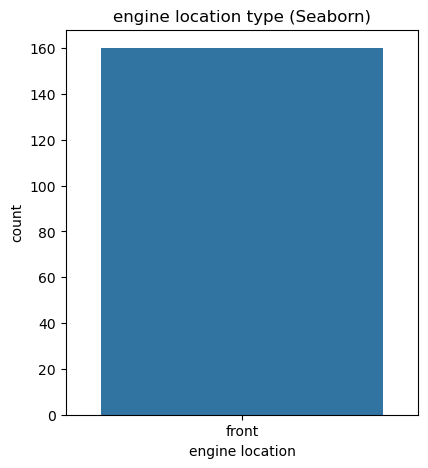

In [44]:
print(df['engine_location'].describe())
engine_location_counts = df['engine_location'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
engine_location_counts.plot(kind='bar')
plt.title('engine location type (Matplotlib)')
plt.xlabel('engine location')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='engine_location',data=df)
plt.title('engine location type (Seaborn)')
plt.xlabel('engine location')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of engine location type, for this dataset is front type, the other one (rear type) is in a very low usage rate.

##### engine_type

count     160
unique      5
top       ohc
freq      124
Name: engine_type, dtype: object


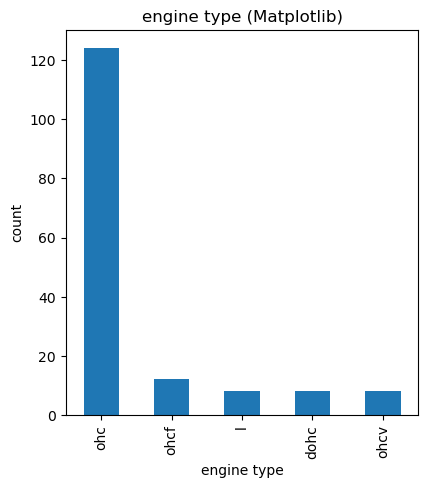

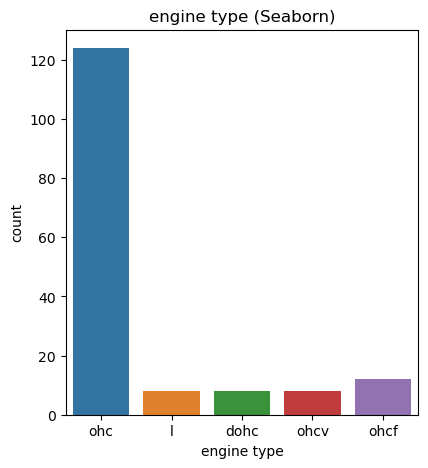

In [45]:
print(df['engine_type'].describe())
engine_type_counts = df['engine_type'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
engine_type_counts.plot(kind='bar')
plt.title('engine type (Matplotlib)')
plt.xlabel('engine type')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='engine_type',data=df)
plt.title('engine type (Seaborn)')
plt.xlabel('engine type')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of engine type, for this dataset is ohc type, others are in a low usage rate.

##### fuel_system

count      160
unique       6
top       mpfi
freq        65
Name: fuel_system, dtype: object


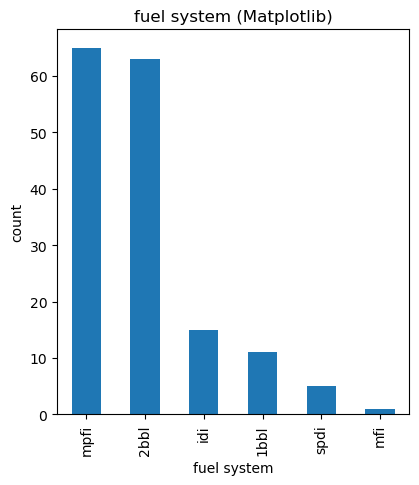

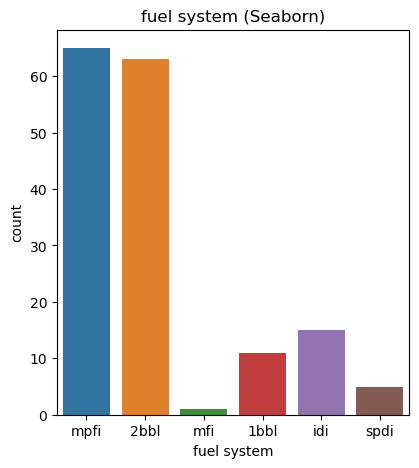

In [46]:
print(df['fuel_system'].describe())
fuel_system_counts = df['fuel_system'].value_counts()
plt.figure(figsize=(10,5))
plt.subplot(121)
fuel_system_counts.plot(kind='bar')
plt.title('fuel system (Matplotlib)')
plt.xlabel('fuel system')
plt.ylabel('count')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x='fuel_system',data=df)
plt.title('fuel system (Seaborn)')
plt.xlabel('fuel system')
plt.ylabel('count')
plt.show()

**Discussion of Result:** Based on the counts for each group this bar chart just confirms that the biggest distribuion of fuel system for this dataset is mpfi system, then the second is the 2bbl system, others are in a low usage rate.

## Data Preparation & Feature Engineering

### Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm? 
Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method

In [47]:
#Get a list of numerical variables
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

#Print numerical variables and their ranges
for var in numeric_vars:
    print(f"Variable: {var}")
    print(f"Min Value: {df[var].min()}, Max Value: {df[var].max()}")

Variable: symboling
Min Value: -2.0, Max Value: 3.0
Variable: normalized_losses
Min Value: 65.0, Max Value: 256.0
Variable: doors_num
Min Value: 0.0, Max Value: 4.0
Variable: wheel_base
Min Value: 86.6, Max Value: 115.6
Variable: length
Min Value: 141.1, Max Value: 202.6
Variable: width
Min Value: 60.3, Max Value: 71.7
Variable: height
Min Value: 49.4, Max Value: 59.8
Variable: curb_weight
Min Value: 1488.0, Max Value: 4066.0
Variable: cylinders_num
Min Value: 3.0, Max Value: 8.0
Variable: engine_size
Min Value: 61.0, Max Value: 258.0
Variable: bore
Min Value: 2.54, Max Value: 3.94
Variable: stroke
Min Value: 2.07, Max Value: 4.17
Variable: compression_ratio
Min Value: 7.0, Max Value: 23.0
Variable: horsepower
Min Value: 48.0, Max Value: 200.0
Variable: peak_rpm
Min Value: 4150.0, Max Value: 6600.0
Variable: city_mpg
Min Value: 15.0, Max Value: 49.0
Variable: highway_mpg
Min Value: 18.0, Max Value: 54.0
Variable: price
Min Value: 5118.0, Max Value: 35056.0


Continuous variables such as wheel_base, length, width, height, curb_weight, engine_size, and compression_ratio have large differences in scale and require standardization.

Discrete variables such as symboling have a certain range but it is relatively small, so feature scaling is not necessary.

### Consider the number-of-doors and price variables:
Based on your EDA work, how many missing data values occur within each of these attributes? As we’ve learned, missing data values can 
impede the proper functioning of many machine learning algorithms. To address the missing the number-of-doors and price values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations MUST be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

* Firstly, find if there are any null value among these data

In [48]:
# Reload the original DataFrame
df = df_original.copy()
#Attempting to convert object columns to numerical types
df['normalized_losses'] = pd.to_numeric(df['normalized_losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')


#Count the number of missing values in each column
missing_values = df[['doors_num', 'price']].isnull().sum()

# Print missing value quantity
print("doors_num ：", missing_values['doors_num'])
print("price ：", missing_values['price'])

doors_num ： 0
price ： 4


* We can know that for the number of doors, there is no null value, but for price, there are 4 null value

In [49]:
new_df = df[['price','curb_weight','engine_size','cylinders_num','highway_mpg']].copy()
missing_values1 = new_df[['price','curb_weight','engine_size','cylinders_num','highway_mpg']].isnull().sum()
print(new_df)
print(missing_values1)

       price  curb_weight  engine_size cylinders_num  highway_mpg
0    16500.0         2548          130             4           27
1    16500.0         2823          152             6           26
2    13950.0         2337          109             4           30
3    17450.0         2824          136             5           22
4    15250.0         2507          136             5           25
..       ...          ...          ...           ...          ...
199  16845.0         2952          141             4           28
200  19045.0         3049          141             4           25
201  21485.0         3012          173             6           23
202  22470.0         3217          145             6           27
203  22625.0         3062          141             4           25

[204 rows x 5 columns]
price            4
curb_weight      0
engine_size      0
cylinders_num    0
highway_mpg      0
dtype: int64


* For the value "price" which has null value, I use Random Forest Algorithm to fill it. Random Forest Algorithm is a flexible, easy-to-use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time.
* Any regression is a process of learning from the feature matrix and solving for the continuous label y. This process is possible because the regression algorithm assumes that there is some connection between the feature matrix and the labels. And labels and features can be interchanged. In this problem of predicting the price of a car using curb weight, engine size, the number of cylinders and highway mpg, we can use these to predict the price of a car.
* For a data with n features, where feature T has a missing value, we treat feature T as a label, and the other n-1 features and the original label form a new feature matrix. For T, the part of the data where it has no missing values is our y_test, which has both labels and features, while the part of the data where it has missing values, which has only features and no labels, is the part we need to predict：
 * x_train: the values of feature T that are not missing correspond to the other n-1 features + the original labels
 * y_train: the value of feature T that is not missing.
 * x_test : other n-1 features corresponding to the missing value of feature T + original labeling
 * y_test : the missing value of feature T, which is unknown, and which we need to predict (fill in)
 * We use the functions in sklearn.ensemble library which includes RandomForestRegressor to solve this problem

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
F:\Anaconda\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


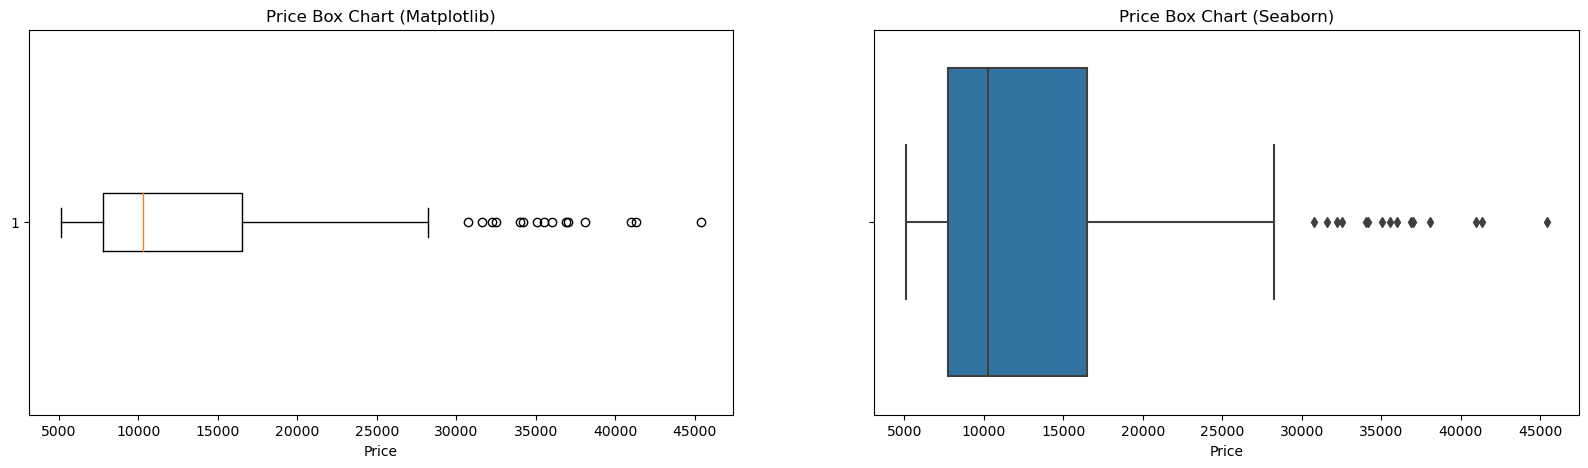

In [50]:
from sklearn.ensemble import RandomForestRegressor
# Reload the original DataFrame
df = df_original.copy()

# Extract the required feature columns and target columns with missing values
df_full = df[['curb_weight', 'engine_size', 'cylinders_num', 'highway_mpg']].copy()
df_nan = df[['price']].copy()

# Divide training and testing sets
Ytrain = df_nan[df_nan.notnull().all(1)]
Ytest = df_nan[df_nan.isnull().all(1)]
Xtrain = df_full.iloc[Ytrain.index]
Xtest = df_full.iloc[Ytest.index]

# Predicting missing values using a random forest regression model
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(Xtrain, Ytrain.values.ravel())
Ypredict = rfc.predict(Xtest)

index = df_nan.index[df_nan.isnull().all(1)]
for i in range(len(index)):
    df_nan.iloc[index[i]] = Ypredict[i]


plt.figure(figsize=(20,5))
plt.subplot(121)
df['price'] =df_nan['price'].astype('float')
plt.boxplot(df['price'], vert=False)
plt.title('Price Box Chart (Matplotlib)')
plt.xlabel('Price')
plt.subplot(122)
df['price'] = df_nan['price'].astype('float')
df_price=df["price"]
sns.boxplot(df_price,orient='v')
plt.title('Price Box Chart (Seaborn)')
plt.xlabel('Price')
plt.show()

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


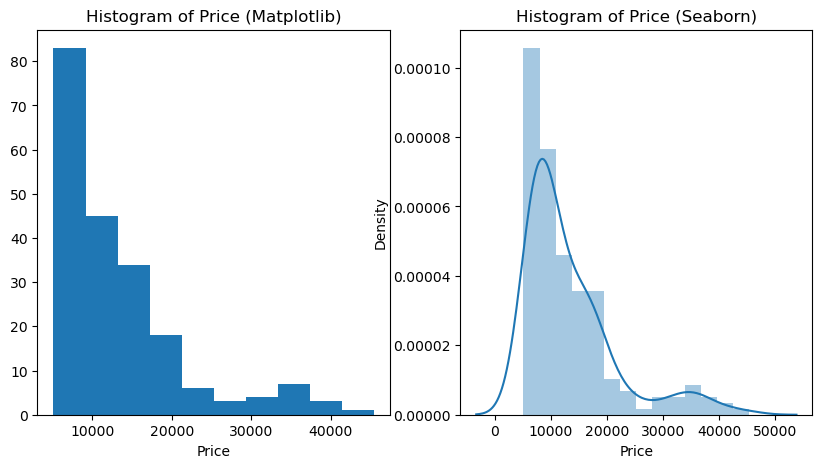

In [51]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(tuple(df['price']))
plt.xlabel('Price')
plt.title('Histogram of Price (Matplotlib)')
plt.subplot(122)
sns.distplot(df_price)
plt.xlabel('Price')
plt.title('Histogram of Price (Seaborn)')
plt.show()

In [52]:
missing_values2 = df['price'].isnull().sum()
print("The number of missing values in 'Price' is: ",missing_values2)
print("The missing values were predicted as :",Ypredict )

The number of missing values in 'Price' is:  0
The missing values were predicted as : [20022.52  6229.61  6345.2  38088.52]


##### Now,we can see the price was with no null value, and the missing values are predicted as:  19352.54, 6140.45, 6222.99, 36884.35

### Consider the engine-size and stroke variables:
Describe the specific feature scaling method you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. Compare your newly created plots against the plots you created for the original content of the variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your 
efforts were not effective.

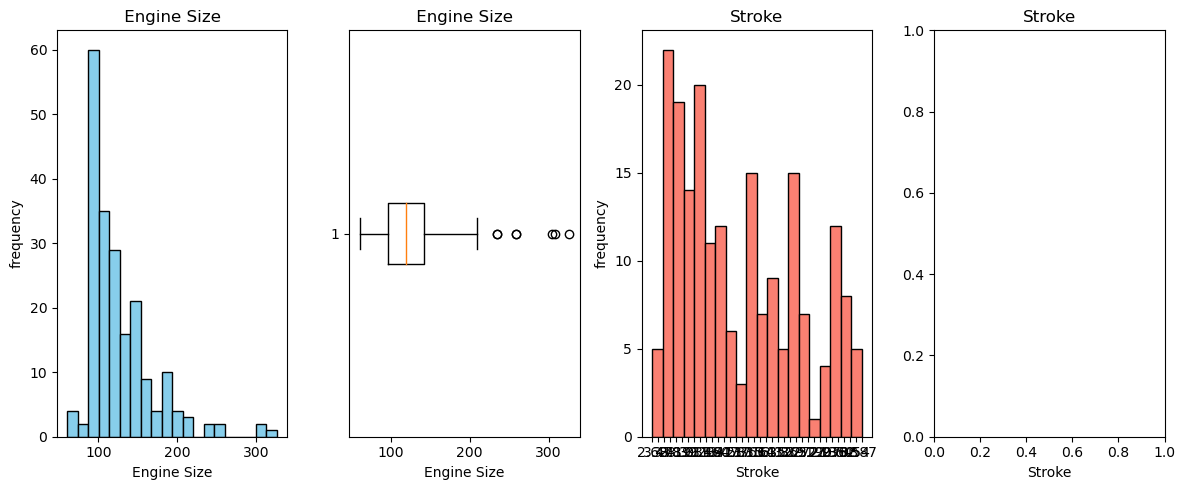

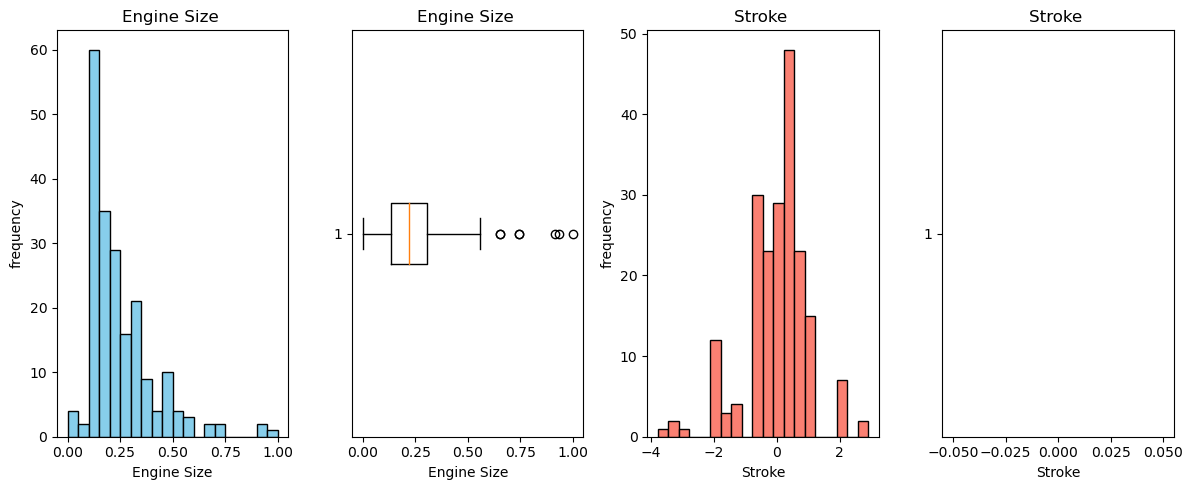

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Reload raw data
df = df_original.copy()

# Original Engine Size Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 4, 1)
plt.hist(df['engine_size'], bins=20, color='skyblue', edgecolor='black')
plt.title(' Engine Size ')
plt.xlabel('Engine Size')
plt.ylabel('frequency')

# Original Engine Size Box Diagram
plt.subplot(1, 4, 2)
plt.boxplot(df['engine_size'], vert=False)
plt.title(' Engine Size ')
plt.xlabel('Engine Size')

# Original Stroke histogram
plt.subplot(1, 4, 3)
plt.hist(df['stroke'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Stroke')
plt.xlabel('Stroke')
plt.ylabel('frequency')

# Original Stroke Box Line Diagram
plt.subplot(1, 4, 4)
stroke_values = df['stroke'].dropna().astype(float).values  
plt.title('Stroke')
plt.xlabel('Stroke')

plt.tight_layout()
plt.show()

#Feature scaling
minmax_scaler = MinMaxScaler()
df['engine_size_scaled'] = minmax_scaler.fit_transform(df[['engine_size']])

standard_scaler = StandardScaler()
df['stroke_standardized'] = standard_scaler.fit_transform(df[['stroke']])

#Draw a scaled chart of features
plt.figure(figsize=(12, 5))

# Engine Size 
plt.subplot(1, 4, 1)
plt.hist(df['engine_size_scaled'], bins=20, color='skyblue', edgecolor='black')
plt.title('Engine Size ')
plt.xlabel('Engine Size')
plt.ylabel('frequency')

# Engine Size 
plt.subplot(1, 4, 2)
plt.boxplot(df['engine_size_scaled'], vert=False)
plt.title('Engine Size ')
plt.xlabel('Engine Size')

# Stroke 
plt.subplot(1, 4, 3)
plt.hist(df['stroke_standardized'], bins=20, color='salmon', edgecolor='black')
plt.title('Stroke ')
plt.xlabel('Stroke')
plt.ylabel('frequency')

# Stroke 
plt.subplot(1, 4, 4)
plt.boxplot(df['stroke_standardized'], vert=False)
plt.title('Stroke ')
plt.xlabel('Stroke')

plt.tight_layout()
plt.show()

### Consider the symboling,make, and engine-type variables:
* A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal
* B) For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.
* C) Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within you Jupyter Notebook.

In [56]:
print(df.dtypes)

symboling                int64
normalized_losses       object
make                    object
fueltype                object
aspiration              object
doors_num               object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
cylinders_num           object
engine_size              int64
fuel_system             object
bore                    object
stroke                  object
compression_ratio      float64
horsepower              object
peak_rpm                object
city_mpg                 int64
highway_mpg              int64
price                   object
engine_size_scaled     float64
stroke_standardized    float64
dtype: object


A：

symboling：numeric/discrete

make：categorical/nominal

engine_type：categorical/nominal

B:

symboling：Directly use the original values.

make and engine_type: One-Hot Encoding.

In [57]:
#Select the required columns
df_sample = df[['symboling', 'make', 'engine_type']].copy()

df_encoded = pd.get_dummies(df_sample, columns=['make', 'engine_type'])
#Display converted data samples
print(df_encoded.head())

   symboling  make_alfa-romero  make_audi  make_bmw  make_chevrolet  \
0          3                 1          0         0               0   
1          1                 1          0         0               0   
2          2                 0          1         0               0   
3          2                 0          1         0               0   
4          2                 0          1         0               0   

   make_dodge  make_honda  make_isuzu  make_jaguar  make_mazda  ...  \
0           0           0           0            0           0  ...   
1           0           0           0            0           0  ...   
2           0           0           0            0           0  ...   
3           0           0           0            0           0  ...   
4           0           0           0            0           0  ...   

   make_toyota  make_volkswagen  make_volvo  engine_type_dohc  \
0            0                0           0                 1   
1            0  

### Consider the wheel-base, length, width, height, curb-weight, engine-size, compression_ratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise,use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by each of your new features.

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak_rpm'] = pd.to_numeric(df['peak_rpm'], errors='coerce')

# Select features that require dimensionality reduction
features = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg']

X = df[features].copy()

# Fill in missing values
X.fillna(X.mean(), inplace=True)

pca = PCA(n_components=2)

# Fitting data using PCA
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
print("Explained Variance Ratio of Principal Components:", pca.explained_variance_ratio_)

We choose PCA as the dimensionality reduction method, which can help us reduce the number of features while retaining key information in the data.
We reduced the data to two-dimensional space and generated two orthogonal features as new principal components.
The first principal component explained about 63.8% of the total variance of the data, while the second principal component explained about 35.97% of the total variance of the data. Two principal components explained approximately 99.8% of the total variance of the data. This indicates that these two principal components are able to capture the features of the data well and retain most of the information.
We observed the scatter plot after dimensionality reduction, and found that the data maintained a clear structure and pattern after dimensionality reduction, indicating that dimensionality reduction was successful.